In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [3]:
data_latih = pd.read_csv('https://drive.google.com/uc?export=download&id=1dNrhXnzpbGj-LT_6t4gYB8rmwg_sNp1R')
data_uji = pd.read_csv('https://drive.google.com/uc?export=download&id=1xYsr16rxomkDf0D20YXTysAR69_1AoJa')

In [4]:
data_latih.columns
# disini menampilkan kolom agar tau attribut apa aja di dalam data ini

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Informasi Umum & Kavling

| Nama Kolom         | Terjemahan & Penjelasan                                           |
|--------------------|-------------------------------------------------------------------|
| Id                 | ID / Pengenal Unik                                                |
| MSSubClass         | Tipe Kelas Bangunan                                               |
| MSZoning           | Klasifikasi Zona (Peruntukan Lahan)                               |
| LotFrontage        | Panjang Sisi Depan Kavling (yang menghadap jalan)                |
| LotArea            | Luas Kavling (dalam kaki persegi)                                |
| Street             | Tipe Akses Jalan                                                  |
| Alley              | Tipe Akses Gang                                                   |
| LotShape           | Bentuk Kavling                                                    |
| LandContour        | Kontur Tanah Kavling                                              |
| Utilities          | Utilitas yang Tersedia (Listrik, Gas, Air, dll.)                 |
| LotConfig          | Konfigurasi Kavling (Pojok, Dalam, dll.)                         |
| LandSlope          | Kemiringan Tanah                                                  |
| Neighborhood       | Lokasi Lingkungan/Perumahan                                       |
| Condition1 & 2     | Kedekatan dengan Kondisi Tertentu (Jalan Raya, Rel, dll.)        |
| BldgType           | Tipe Bangunan (Rumah Tunggal, Townhouse, dll.)                   |
| HouseStyle         | Gaya/Model Rumah (1 Lantai, 2 Lantai, dll.)                      |

### Kualitas & Kondisi

| Nama Kolom         | Terjemahan & Penjelasan                                           |
|--------------------|-------------------------------------------------------------------|
| OverallQual        | Kualitas Material dan Finishing Keseluruhan                      |
| OverallCond        | Kondisi Keseluruhan Rumah                                         |
| ExterQual          | Kualitas Material Eksterior                                       |
| ExterCond          | Kondisi Eksterior Saat Ini                                        |
| BsmtQual           | Kualitas (Tinggi) Basement                                        |
| BsmtCond           | Kondisi Umum Basement                                             |
| HeatingQC          | Kualitas dan Kondisi Pemanas                                      |
| KitchenQual        | Kualitas Dapur                                                    |
| FireplaceQu        | Kualitas Perapian                                                 |
| GarageQual         | Kualitas Garasi                                                   |
| GarageCond         | Kondisi Garasi                                                    |
| PoolQC             | Kualitas Kolam Renang                                             |

### Detail Bangunan & Konstruksi

| Nama Kolom         | Terjemahan & Penjelasan                                           |
|--------------------|-------------------------------------------------------------------|
| YearBuilt          | Tahun Dibangun                                                    |
| YearRemodAdd       | Tahun Renovasi (atau penambahan, jika tidak ada renovasi)        |
| RoofStyle          | Gaya Atap                                                         |
| RoofMatl           | Material Atap                                                     |
| Exterior1st & 2nd  | Material Pelapis Eksterior (Utama & Tambahan)                    |
| MasVnrType         | Tipe Pelapis Dinding Batu (Veneer)                                |
| MasVnrArea         | Luas Pelapis Dinding Batu (dalam kaki persegi)                   |
| Foundation         | Tipe Fondasi                                                      |
| Heating            | Tipe Pemanas                                                      |
| CentralAir         | AC Sentral (Ya/Tidak)                                             |
| Electrical         | Sistem Kelistrikan                                                |

### Informasi Basement

| Nama Kolom         | Terjemahan & Penjelasan                                           |
|--------------------|-------------------------------------------------------------------|
| BsmtExposure       | Eksposur Dinding Basement (ke taman/cahaya)                      |
| BsmtFinType1 & 2   | Kualitas Area Jadi Basement (Tipe 1 & 2)                          |
| BsmtFinSF1 & 2     | Luas Area Jadi Basement (Tipe 1 & 2, dalam kaki persegi)         |
| BsmtUnfSF          | Luas Area Basement yang Belum Jadi (dalam kaki persegi)          |
| TotalBsmtSF        | Total Luas Basement (dalam kaki persegi)                         |

### Informasi Ruangan & Area

| Nama Kolom         | Terjemahan & Penjelasan                                           |
|--------------------|-------------------------------------------------------------------|
| 1stFlrSF           | Luas Lantai 1 (dalam kaki persegi)                               |
| 2ndFlrSF           | Luas Lantai 2 (dalam kaki persegi)                               |
| LowQualFinSF       | Luas Area dengan Kualitas Rendah (dalam kaki persegi)           |
| GrLivArea          | Luas Area Tinggal di Atas Tanah (kaki persegi)                   |
| BsmtFullBath       | Jumlah Kamar Mandi Penuh di Basement                             |
| BsmtHalfBath       | Jumlah Kamar Mandi Setengah di Basement                          |
| FullBath           | Jumlah Kamar Mandi Penuh di Atas Tanah                           |
| HalfBath           | Jumlah Kamar Mandi Setengah di Atas Tanah                        |
| BedroomAbvGr       | Jumlah Kamar Tidur di Atas Tanah                                 |
| KitchenAbvGr       | Jumlah Dapur di Atas Tanah                                       |
| TotRmsAbvGrd       | Total Kamar di Atas Tanah (tidak termasuk kamar mandi)          |

### Informasi Garasi

| Nama Kolom         | Terjemahan & Penjelasan                                           |
|--------------------|-------------------------------------------------------------------|
| GarageType         | Tipe Garasi (Terhubung, Terpisah, dll.)                          |
| GarageYrBlt        | Tahun Garasi Dibangun                                             |
| GarageFinish       | Finishing Interior Garasi (Jadi, Belum Jadi, dll.)               |
| GarageCars         | Kapasitas Garasi (dalam jumlah mobil)                            |
| GarageArea         | Luas Garasi (dalam kaki persegi)                                 |

### Fitur Tambahan

| Nama Kolom         | Terjemahan & Penjelasan                                           |
|--------------------|-------------------------------------------------------------------|
| Functional         | Fungsionalitas Rumah (Tipikal, Rusak Ringan, dll.)              |
| Fireplaces         | Jumlah Perapian                                                   |
| PavedDrive         | Jalan Masuk Beraspal                                              |
| WoodDeckSF         | Luas Dek Kayu (dalam kaki persegi)                               |
| OpenPorchSF        | Luas Teras Terbuka (dalam kaki persegi)                          |
| EnclosedPorch      | Luas Teras Tertutup (dalam kaki persegi)                         |
| 3SsnPorch          | Luas Teras Tiga Musim (dalam kaki persegi)                       |
| ScreenPorch        | Luas Teras Berjaring (dalam kaki persegi)                        |
| PoolArea           | Luas Kolam Renang (dalam kaki persegi)                           |
| Fence              | Kualitas Pagar                                                    |
| MiscFeature        | Fitur Tambahan Lainnya (Lift, Lapangan Tenis, dll.)             |
| MiscVal            | Nilai dari Fitur Tambahan                                         |

### Informasi Penjualan

| Nama Kolom         | Terjemahan & Penjelasan                                           |
|--------------------|-------------------------------------------------------------------|
| MoSold             | Bulan Terjual                                                     |
| YrSold             | Tahun Terjual                                                     |
| SaleType           | Tipe Penjualan                                                    |
| SaleCondition      | Kondisi Penjualan                                                 |
| SalePrice          | Harga Jual (biasanya ini adalah target prediksi)                 |


In [5]:
nama_kolom_baru = {
    'MSSubClass': 'Tipe_Kelas_Bangunan', 'MSZoning': 'Klasifikasi_Zona', 'LotFrontage': 'Panjang_Depan_Kavling',
    'LotArea': 'Luas_Kavling', 'Street': 'Akses_Jalan', 'Alley': 'Akses_Gang', 'LotShape': 'Bentuk_Kavling',
    'LandContour': 'Kontur_Tanah', 'Utilities': 'Utilitas', 'LotConfig': 'Konfigurasi_Kavling',
    'LandSlope': 'Kemiringan_Tanah', 'Neighborhood': 'Lingkungan', 'Condition1': 'Kondisi1', 'Condition2': 'Kondisi2',
    'BldgType': 'Tipe_Bangunan', 'HouseStyle': 'Gaya_Rumah', 'OverallQual': 'Kualitas_Keseluruhan',
    'OverallCond': 'Kondisi_Keseluruhan', 'YearBuilt': 'Tahun_Dibangun', 'YearRemodAdd': 'Tahun_Renovasi',
    'RoofStyle': 'Gaya_Atap', 'RoofMatl': 'Material_Atap', 'Exterior1st': 'Eksterior1', 'Exterior2nd': 'Eksterior2',
    'MasVnrType': 'Tipe_Veneer_Batu', 'MasVnrArea': 'Luas_Veneer_Batu', 'ExterQual': 'Kualitas_Eksterior',
    'ExterCond': 'Kondisi_Eksterior', 'Foundation': 'Fondasi', 'BsmtQual': 'Kualitas_Basement',
    'BsmtCond': 'Kondisi_Basement', 'BsmtExposure': 'Eksposur_Basement', 'BsmtFinType1': 'Tipe_Jadi_Basement1',
    'BsmtFinSF1': 'Luas_Jadi_Basement1', 'BsmtFinType2': 'Tipe_Jadi_Basement2', 'BsmtFinSF2': 'Luas_Jadi_Basement2',
    'BsmtUnfSF': 'Luas_Belum_Jadi_Basement', 'TotalBsmtSF': 'Total_Luas_Basement', 'Heating': 'Pemanas',
    'HeatingQC': 'Kualitas_Pemanas', 'CentralAir': 'AC_Sentral', 'Electrical': 'Kelistrikan', '1stFlrSF': 'Luas_Lantai1',
    '2ndFlrSF': 'Luas_Lantai2', 'LowQualFinSF': 'Luas_Kualitas_Rendah', 'GrLivArea': 'Luas_Area_Tinggal',
    'BsmtFullBath': 'KamarMandi_Penuh_Basement', 'BsmtHalfBath': 'KamarMandi_Setengah_Basement',
    'FullBath': 'KamarMandi_Penuh_Atas', 'HalfBath': 'KamarMandi_Setengah_Atas', 'BedroomAbvGr': 'Jumlah_Kamar_Tidur',
    'KitchenAbvGr': 'Jumlah_Dapur', 'KitchenQual': 'Kualitas_Dapur', 'TotRmsAbvGrd': 'Total_Kamar',
    'Functional': 'Fungsionalitas', 'Fireplaces': 'Jumlah_Perapian', 'FireplaceQu': 'Kualitas_Perapian',
    'GarageType': 'Tipe_Garasi', 'GarageYrBlt': 'Tahun_Garasi_Dibangun', 'GarageFinish': 'Finishing_Garasi',
    'GarageCars': 'Kapasitas_Mobil_Garasi', 'GarageArea': 'Luas_Garasi', 'GarageQual': 'Kualitas_Garasi',
    'GarageCond': 'Kondisi_Garasi', 'PavedDrive': 'Jalan_Aspal', 'WoodDeckSF': 'Luas_Dek_Kayu',
    'OpenPorchSF': 'Luas_Teras_Terbuka', 'EnclosedPorch': 'Luas_Teras_Tertutup', '3SsnPorch': 'Luas_Teras_3_Musim',
    'ScreenPorch': 'Luas_Teras_Berjaring', 'PoolArea': 'Luas_Kolam_Renang', 'PoolQC': 'Kualitas_Kolam',
    'Fence': 'Pagar', 'MiscFeature': 'Fitur_Lain', 'MiscVal': 'Nilai_Fitur_Lain', 'MoSold': 'Bulan_Terjual',
    'YrSold': 'Tahun_Terjual', 'SaleType': 'Tipe_Penjualan', 'SaleCondition': 'Kondisi_Penjualan', 'SalePrice': 'Harga_Jual'
}

In [6]:
# Aku sengaja terjemahkan kolom ini agar mudah dimengerti
data_latih.rename(columns=nama_kolom_baru, inplace=True)

In [7]:
data_uji.rename(columns=nama_kolom_baru, inplace=True)

In [8]:
data_latih.describe()

Id  Tipe_Kelas_Bangunan  Panjang_Depan_Kavling   Luas_Kavling  \
count  1460.000000          1460.000000            1201.000000    1460.000000   
mean    730.500000            56.897260              70.049958   10516.828082   
std     421.610009            42.300571              24.284752    9981.264932   
min       1.000000            20.000000              21.000000    1300.000000   
25%     365.750000            20.000000              59.000000    7553.500000   
50%     730.500000            50.000000              69.000000    9478.500000   
75%    1095.250000            70.000000              80.000000   11601.500000   
max    1460.000000           190.000000             313.000000  215245.000000   

       Kualitas_Keseluruhan  Kondisi_Keseluruhan  Tahun_Dibangun  \
count           1460.000000          1460.000000     1460.000000   
mean               6.099315             5.575342     1971.267808   
std                1.382997             1.112799       30.202904   
min                1.000000             1.000000     1872.000000   
25%                5.000000             5.000000     1954.000000   
50%                6.000000             5.000000     1973.000000   
75%                7.000000             6.000000     2000.000000   
max               10.000000             9.000000     2010.000000   

       Tahun_Renovasi  Luas_Veneer_Batu  Luas_Jadi_Basement1  ...  \
count     1460.000000       1452.000000          1460.000000  ...   
mean      1984.865753        103.685262           443.639726  ...   
std         20.645407        181.066207           456.098091  ...   
min       1950.000000          0.000000             0.000000  ...   
25%       1967.000000          0.000000             0.000000  ...   
50%       1994.000000          0.000000           383.500000  ...   
75%       2004.000000        166.000000           712.250000  ...   
max       2010.000000       1600.000000          5644.000000  ...   

       Luas_Dek_Kayu  Luas_Teras_Terbuka  Luas_Teras_Tertutup  \
count    1460.000000         1460.000000          1460.000000   
mean       94.244521           46.660274            21.954110   
std       125.338794           66.256028            61.119149   
min         0.000000            0.000000             0.000000   
25%         0.000000            0.000000             0.000000   
50%         0.000000           25.000000             0.000000   
75%       168.000000           68.000000             0.000000   
max       857.000000          547.000000           552.000000   

       Luas_Teras_3_Musim  Luas_Teras_Berjaring  Luas_Kolam_Renang  \
count         1460.000000           1460.000000        1460.000000   
mean             3.409589             15.060959           2.758904   
std             29.317331             55.757415          40.177307   
min              0.000000              0.000000           0.000000   
25%              0.000000              0.000000           0.000000   
50%              0.000000              0.000000           0.000000   
75%              0.000000              0.000000           0.000000   
max            508.000000            480.000000         738.000000   

       Nilai_Fitur_Lain  Bulan_Terjual  Tahun_Terjual     Harga_Jual  
count       1460.000000    1460.000000    1460.000000    1460.000000  
mean          43.489041       6.321918    2007.815753  180921.195890  
std          496.123024       2.703626       1.328095   79442.502883  
min            0.000000       1.000000    2006.000000   34900.000000  
25%            0.000000       5.000000    2007.000000  129975.000000  
50%            0.000000       6.000000    2008.000000  163000.000000  
75%            0.000000       8.000000    2009.000000  214000.000000  
max        15500.000000      12.000000    2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
data_latih.dtypes[data_latih.dtypes != 'object']
# dan disini menguraikan tipe data untuk setiap objek itu apa aja

Id                                int64
Tipe_Kelas_Bangunan               int64
Panjang_Depan_Kavling           float64
Luas_Kavling                      int64
Kualitas_Keseluruhan              int64
Kondisi_Keseluruhan               int64
Tahun_Dibangun                    int64
Tahun_Renovasi                    int64
Luas_Veneer_Batu                float64
Luas_Jadi_Basement1               int64
Luas_Jadi_Basement2               int64
Luas_Belum_Jadi_Basement          int64
Total_Luas_Basement               int64
Luas_Lantai1                      int64
Luas_Lantai2                      int64
Luas_Kualitas_Rendah              int64
Luas_Area_Tinggal                 int64
KamarMandi_Penuh_Basement         int64
KamarMandi_Setengah_Basement      int64
KamarMandi_Penuh_Atas             int64
KamarMandi_Setengah_Atas          int64
Jumlah_Kamar_Tidur                int64
Jumlah_Dapur                      int64
Total_Kamar                       int64
Jumlah_Perapian                   int64


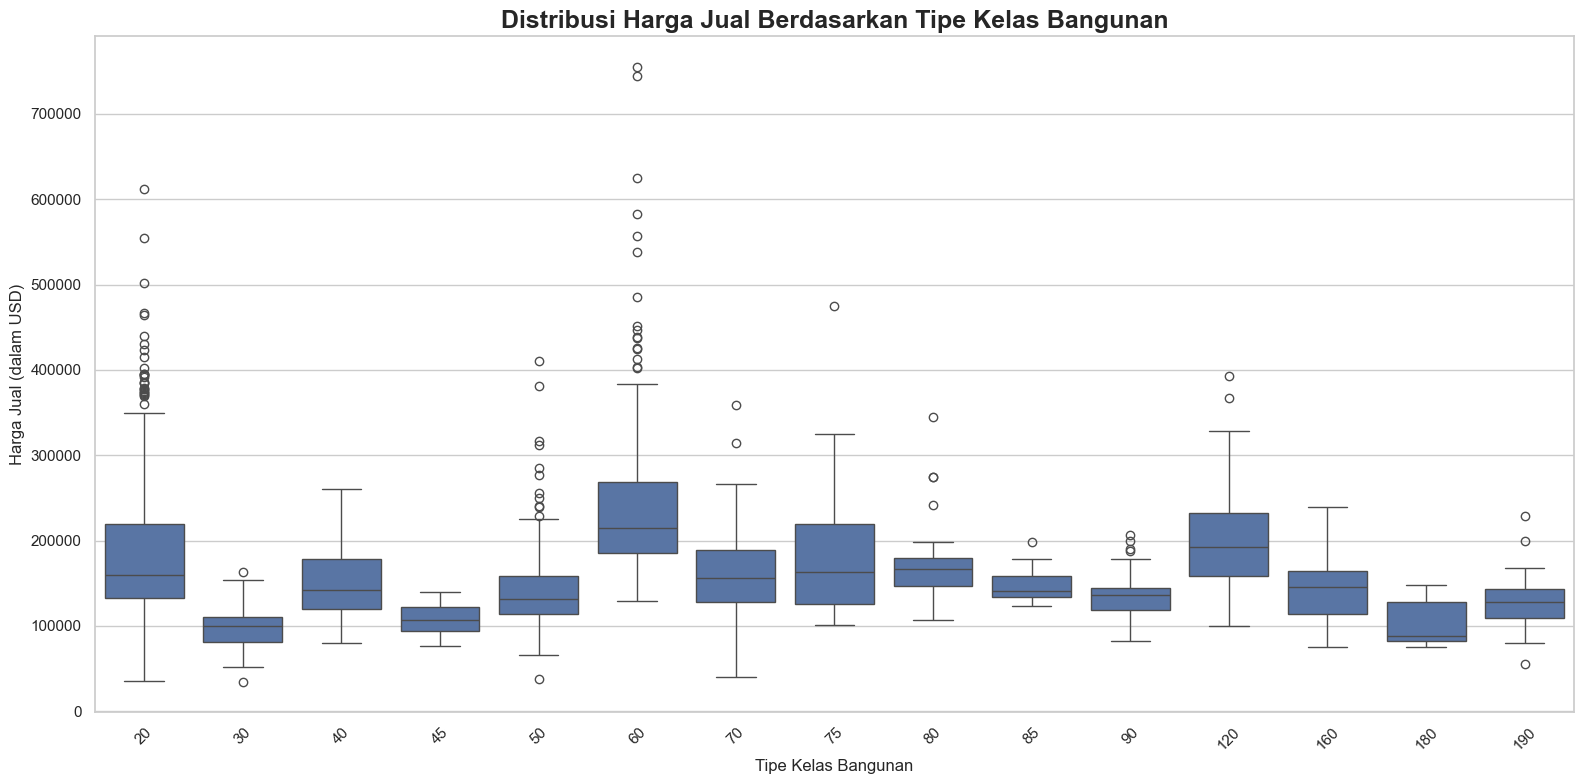

In [10]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.boxplot(x='Tipe_Kelas_Bangunan', y='Harga_Jual', data=data_latih)
plt.title('Distribusi Harga Jual Berdasarkan Tipe Kelas Bangunan', fontsize=18, fontweight='bold')
plt.xlabel('Tipe Kelas Bangunan', fontsize=12)
plt.ylabel('Harga Jual (dalam USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Kemudian disini saya memvsiualisasikan agar bisa tau ada outlier

Text(0, 0.5, 'Harga Jual (SalePrice)')

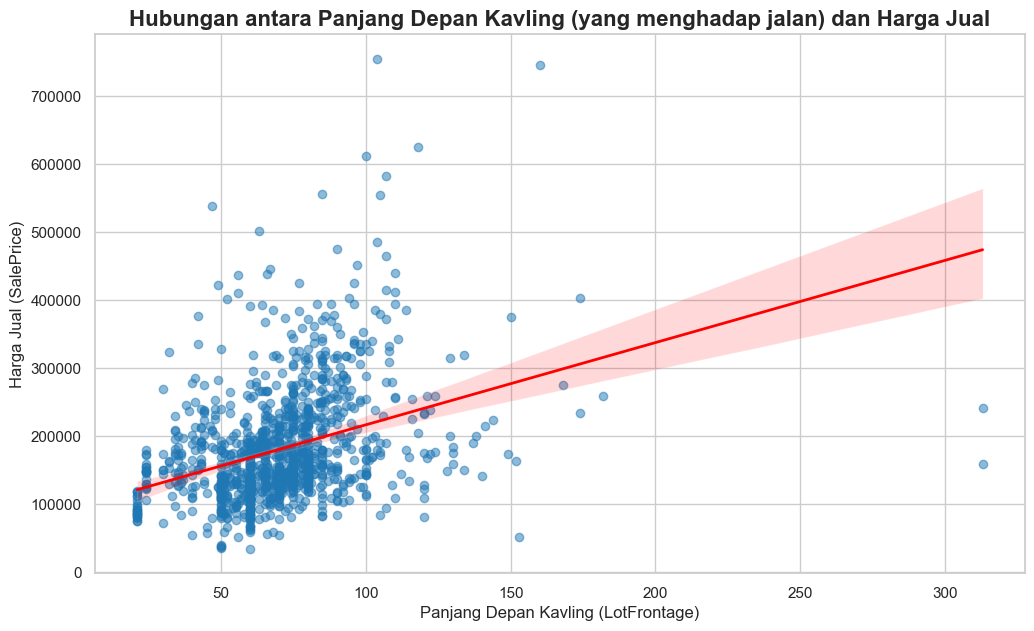

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.regplot(
    x='Panjang_Depan_Kavling',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha':0.5, 'color':'#1f77b4'}, # Membuat titik sedikit transparan
    line_kws={'color':'red', 'linewidth':2}     # Membuat garis tren berwarna merah
)
plt.title('Hubungan antara Panjang Depan Kavling (yang menghadap jalan) dan Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Panjang Depan Kavling (LotFrontage)', fontsize=12)
plt.ylabel('Harga Jual (SalePrice)', fontsize=12)

In [12]:
data_latih.query('Panjang_Depan_Kavling > 300')
#Hilangkan 935, 1299

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
934    935                   20               RL                  313.0   
1298  1299                   60               RL                  313.0   

      Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah  \
934          27650        Pave        NaN            IR2          HLS   
1298         63887        Pave        NaN            IR3          Bnk   

     Utilitas  ... Luas_Kolam_Renang Kualitas_Kolam Pagar Fitur_Lain  \
934    AllPub  ...                 0            NaN   NaN        NaN   
1298   AllPub  ...               480             Gd   NaN        NaN   

     Nilai_Fitur_Lain Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  \
934                 0            11          2008              WD   
1298                0             1          2008             New   

      Kondisi_Penjualan  Harga_Jual  
934              Normal      242000  
1298            Partial      160000  

[2 rows x 81 columns]

Text(0, 0.5, 'Harga Jual (SalePrice)')

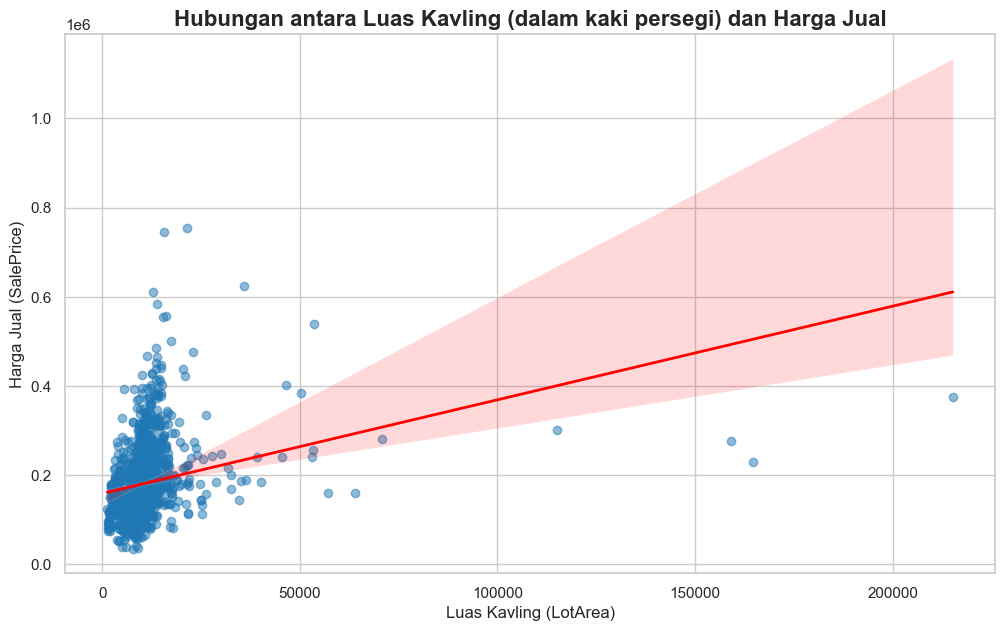

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.regplot(
    x='Luas_Kavling',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha':0.5, 'color':'#1f77b4'}, # Membuat titik sedikit transparan
    line_kws={'color':'red', 'linewidth':2}     # Membuat garis tren berwarna merah
)
plt.title('Hubungan antara Luas Kavling (dalam kaki persegi) dan Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Kavling (LotArea)', fontsize=12)
plt.ylabel('Harga Jual (SalePrice)', fontsize=12)

In [14]:
data_latih.query('Luas_Kavling > 55000')
# 250, 314, 336, 707
#maybe 1397

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
249    250                   50               RL                    NaN   
313    314                   20               RL                  150.0   
335    336                  190               RL                    NaN   
451    452                   20               RL                   62.0   
706    707                   20               RL                    NaN   
1298  1299                   60               RL                  313.0   
1396  1397                   20               RL                    NaN   

      Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah  \
249         159000        Pave        NaN            IR2          Low   
313         215245        Pave        NaN            IR3          Low   
335         164660        Grvl        NaN            IR1          HLS   
451          70761        Pave        NaN            IR1          Low   
706         115149        Pave        NaN            IR2          Low   
1298         63887        Pave        NaN            IR3          Bnk   
1396         57200        Pave        NaN            IR1          Bnk   

     Utilitas  ... Luas_Kolam_Renang Kualitas_Kolam Pagar Fitur_Lain  \
249    AllPub  ...                 0            NaN   NaN       Shed   
313    AllPub  ...                 0            NaN   NaN        NaN   
335    AllPub  ...                 0            NaN   NaN       Shed   
451    AllPub  ...                 0            NaN   NaN        NaN   
706    AllPub  ...                 0            NaN   NaN        NaN   
1298   AllPub  ...               480             Gd   NaN        NaN   
1396   AllPub  ...                 0            NaN   NaN        NaN   

     Nilai_Fitur_Lain Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  \
249               500             6          2007              WD   
313                 0             6          2009              WD   
335               700             8          2008              WD   
451                 0            12          2006              WD   
706                 0             6          2007              WD   
1298                0             1          2008             New   
1396                0             6          2010              WD   

      Kondisi_Penjualan  Harga_Jual  
249              Normal      277000  
313              Normal      375000  
335              Normal      228950  
451              Normal      280000  
706              Normal      302000  
1298            Partial      160000  
1396             Normal      160000  

[7 rows x 81 columns]

akan dihilangkan 250, 314, 336, 707
**Kemungkinan yang dihilangkan 1397**

In [15]:
pd.Series(stats.zscore(data_latih['Luas_Kavling'])).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
dtype: float64

Baris ini menunjukkan bahwa baris indeks 313 memiliki nilai Luas_Kavling yang 20.5 standar deviasi di atas rata-rata! Itu ekstrem sekali dan hampir pasti outlier.

Baris-baris seperti indeks 335, 249, dan seterusnya juga jauh di atas normal.



Text(0, 0.5, 'Harga Jual (SalePrice)')

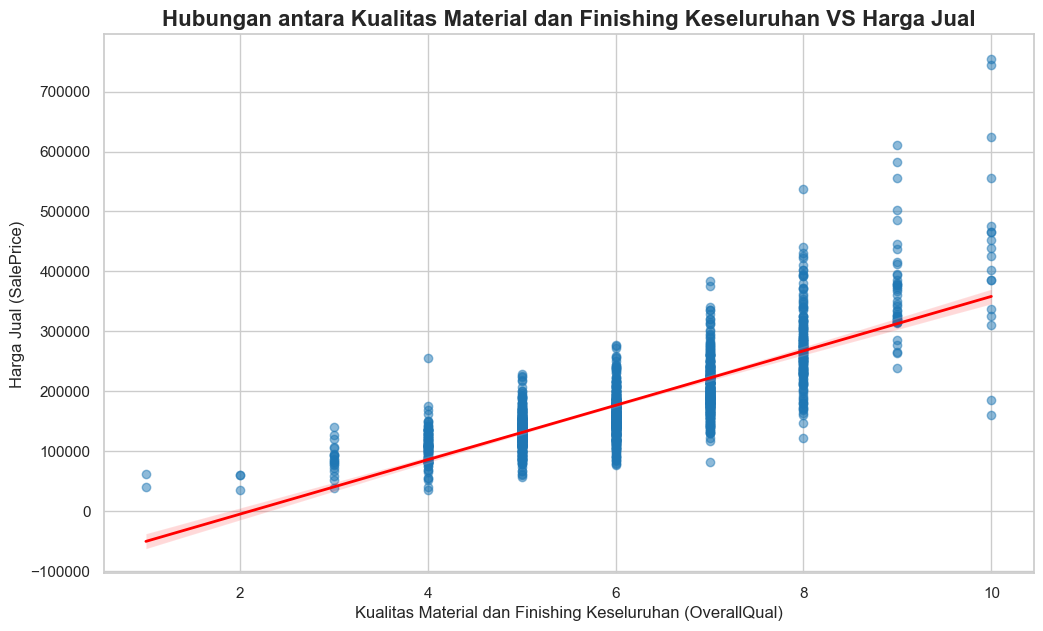

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.regplot(
    x='Kualitas_Keseluruhan',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha':0.5, 'color':'#1f77b4'}, # Membuat titik sedikit transparan
    line_kws={'color':'red', 'linewidth':2}     # Membuat garis tren berwarna merah
)
plt.title('Hubungan antara Kualitas Material dan Finishing Keseluruhan VS Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Kualitas Material dan Finishing Keseluruhan (OverallQual)', fontsize=12)
plt.ylabel('Harga Jual (SalePrice)', fontsize=12)

In [17]:
data_latih.query('Kualitas_Keseluruhan == 10')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
58      59                   60               RL                   66.0   
185    186                   75               RM                   90.0   
224    225                   20               RL                  103.0   
389    390                   60               RL                   96.0   
440    441                   20               RL                  105.0   
515    516                   20               RL                   94.0   
523    524                   60               RL                  130.0   
583    584                   75               RM                   75.0   
591    592                   60               RL                   97.0   
691    692                   60               RL                  104.0   
825    826                   20               RL                  114.0   
994    995                   20               RL                   96.0   
1169  1170                   60               RL                  118.0   
1182  1183                   60               RL                  160.0   
1243  1244                   20               RL                  107.0   
1298  1299                   60               RL                  313.0   
1373  1374                   20               RL                    NaN   
1442  1443                   60               FV                   85.0   

      Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah  \
58           13682        Pave        NaN            IR2          HLS   
185          22950        Pave        NaN            IR2          Lvl   
224          13472        Pave        NaN            Reg          Lvl   
389          12474        Pave        NaN            Reg          Lvl   
440          15431        Pave        NaN            Reg          Lvl   
515          12220        Pave        NaN            Reg          Lvl   
523          40094        Pave        NaN            IR1          Bnk   
583          13500        Pave        NaN            Reg          Lvl   
591          13478        Pave        NaN            IR1          Lvl   
691          21535        Pave        NaN            IR1          Lvl   
825          14803        Pave        NaN            Reg          Lvl   
994          12456        Pave        NaN            Reg          Lvl   
1169         35760        Pave        NaN            IR1          Lvl   
1182         15623        Pave        NaN            IR1          Lvl   
1243         13891        Pave        NaN            Reg          Lvl   
1298         63887        Pave        NaN            IR3          Bnk   
1373         11400        Pave        NaN            Reg          Lvl   
1442         11003        Pave        NaN            Reg          Lvl   

     Utilitas  ... Luas_Kolam_Renang Kualitas_Kolam  Pagar Fitur_Lain  \
58     AllPub  ...                 0            NaN    NaN        NaN   
185    AllPub  ...                 0            NaN  GdPrv        NaN   
224    AllPub  ...                 0            NaN    NaN        NaN   
389    AllPub  ...                 0            NaN    NaN        NaN   
440    AllPub  ...                 0            NaN    NaN        NaN   
515    AllPub  ...                 0            NaN    NaN        NaN   
523    AllPub  ...                 0            NaN    NaN        NaN   
583    AllPub  ...                 0            NaN    NaN        NaN   
591    AllPub  ...                 0            NaN    NaN        NaN   
691    AllPub  ...                 0            NaN    NaN        NaN   
825    AllPub  ...                 0            NaN    NaN        NaN   
994    AllPub  ...                 0            NaN    NaN        NaN   
1169   AllPub  ...                 0            NaN    NaN        NaN   
1182   AllPub  ...               555             Ex  MnPrv        NaN   
1243   AllPub  ...                 0            NaN    NaN        NaN   
1298   AllPub  ...        

ada kemungkinan saya menghapus 524

Text(0, 0.5, 'Harga Jual (SalePrice)')

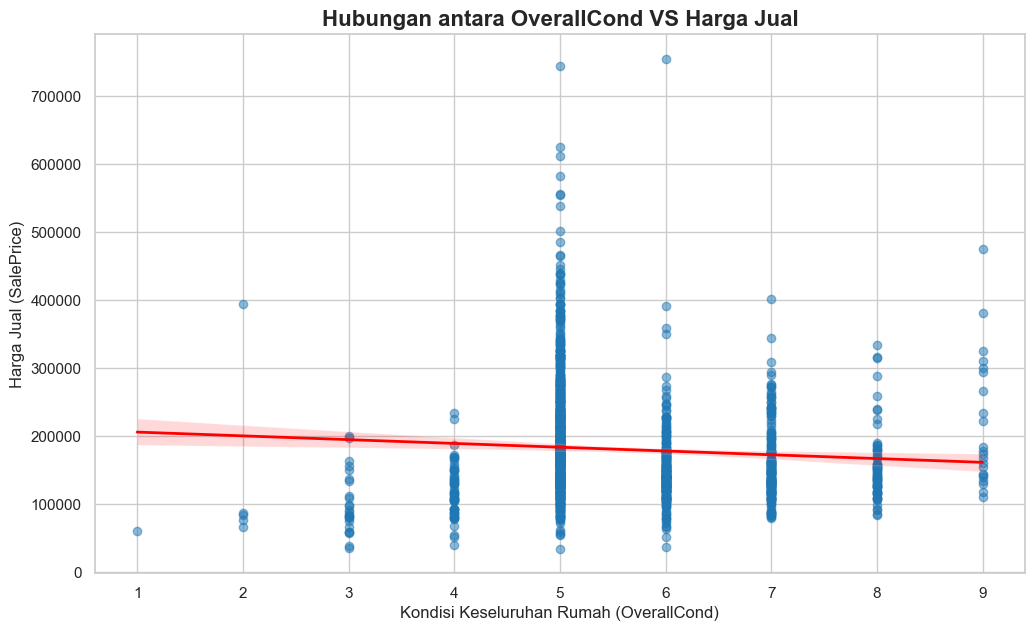

In [18]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.regplot(
    x='Kondisi_Keseluruhan',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha':0.5, 'color':'#1f77b4'}, # Membuat titik sedikit transparan
    line_kws={'color':'red', 'linewidth':2}     # Membuat garis tren berwarna merah
)
plt.title('Hubungan antara OverallCond VS Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Kondisi Keseluruhan Rumah (OverallCond)', fontsize=12)
plt.ylabel('Harga Jual (SalePrice)', fontsize=12)

In [19]:
data_latih.query('Kondisi_Keseluruhan == 2')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
88    89                   50          C (all)                  105.0   
250  251                   30               RL                   55.0   
378  379                   20               RL                   88.0   
398  399                   30               RM                   60.0   
676  677                   70               RM                   60.0   

     Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah Utilitas  \
88           8470        Pave        NaN            IR1          Lvl   AllPub   
250          5350        Pave        NaN            IR1          Lvl   AllPub   
378         11394        Pave        NaN            Reg          Lvl   AllPub   
398          8967        Pave        NaN            Reg          Lvl   AllPub   
676          9600        Pave       Grvl            Reg          Lvl   AllPub   

     ... Luas_Kolam_Renang Kualitas_Kolam  Pagar Fitur_Lain Nilai_Fitur_Lain  \
88   ...                 0            NaN  MnPrv        NaN                0   
250  ...                 0            NaN   GdWo       Shed              450   
378  ...                 0            NaN    NaN        NaN                0   
398  ...                 0            NaN    NaN        NaN                0   
676  ...                 0            NaN    NaN        NaN                0   

    Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  Kondisi_Penjualan  Harga_Jual  
88             10          2009           ConLD            Abnorml       85000  
250             5          2010              WD             Normal       76500  
378             6          2010             New            Partial      394432  
398            11          2007              WD            Abnorml       67000  
676             5          2006              WD             Normal       87000  

[5 rows x 81 columns]

379 kayaknya

In [20]:
data_latih.query('Kondisi_Keseluruhan == 5 & Harga_Jual > 700000')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
1182  1183                   60               RL                  160.0   

      Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah  \
1182         15623        Pave        NaN            IR1          Lvl   

     Utilitas  ... Luas_Kolam_Renang Kualitas_Kolam  Pagar Fitur_Lain  \
1182   AllPub  ...               555             Ex  MnPrv        NaN   

     Nilai_Fitur_Lain Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  \
1182                0             7          2007              WD   

      Kondisi_Penjualan  Harga_Jual  
1182            Abnorml      745000  

[1 rows x 81 columns]

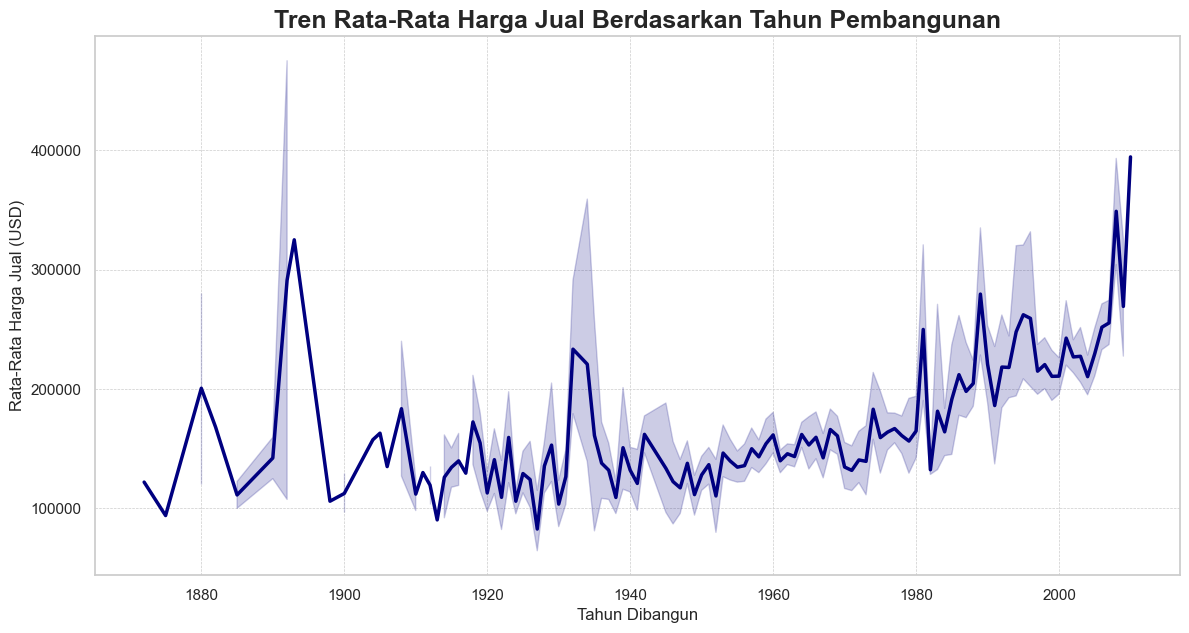

In [21]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))
sns.lineplot(
    x='Tahun_Dibangun',
    y='Harga_Jual',
    data=data_latih,
    color='navy', # Warna garis yang lebih solid
    linewidth=2.5
)
plt.title('Tren Rata-Rata Harga Jual Berdasarkan Tahun Pembangunan', fontsize=18, fontweight='bold')
plt.xlabel('Tahun Dibangun', fontsize=12) # Label yang benar
plt.ylabel('Rata-Rata Harga Jual (USD)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [22]:
data_latih.query('Tahun_Dibangun < 1900 & Harga_Jual > 400000')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
185  186                   75               RM                   90.0   

     Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah Utilitas  \
185         22950        Pave        NaN            IR2          Lvl   AllPub   

     ... Luas_Kolam_Renang Kualitas_Kolam  Pagar Fitur_Lain Nilai_Fitur_Lain  \
185  ...                 0            NaN  GdPrv        NaN                0   

    Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  Kondisi_Penjualan  Harga_Jual  
185             6          2006              WD             Normal      475000  

[1 rows x 81 columns]

186

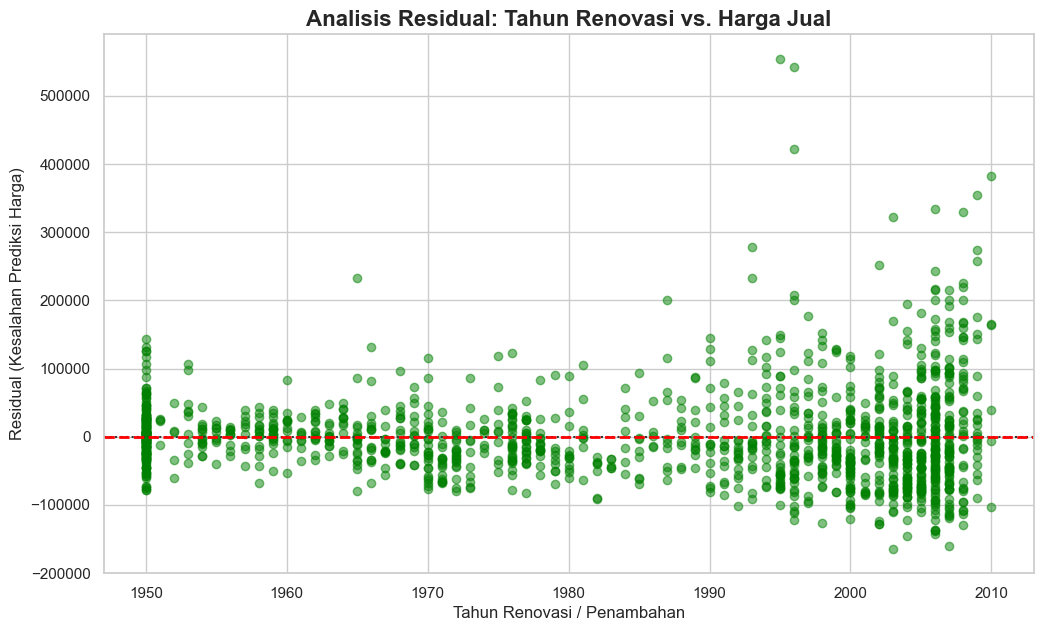

In [23]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Tahun_Renovasi',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Tahun Renovasi vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Tahun Renovasi / Penambahan', fontsize=12) # Label dibuat lebih ringkas
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [24]:
data_latih.query('Tahun_Renovasi < 1970 & Harga_Jual > 300000')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
313  314                   20               RL                  150.0   

     Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah Utilitas  \
313        215245        Pave        NaN            IR3          Low   AllPub   

     ... Luas_Kolam_Renang Kualitas_Kolam Pagar Fitur_Lain Nilai_Fitur_Lain  \
313  ...                 0            NaN   NaN        NaN                0   

    Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  Kondisi_Penjualan  Harga_Jual  
313             6          2009              WD             Normal      375000  

[1 rows x 81 columns]

314

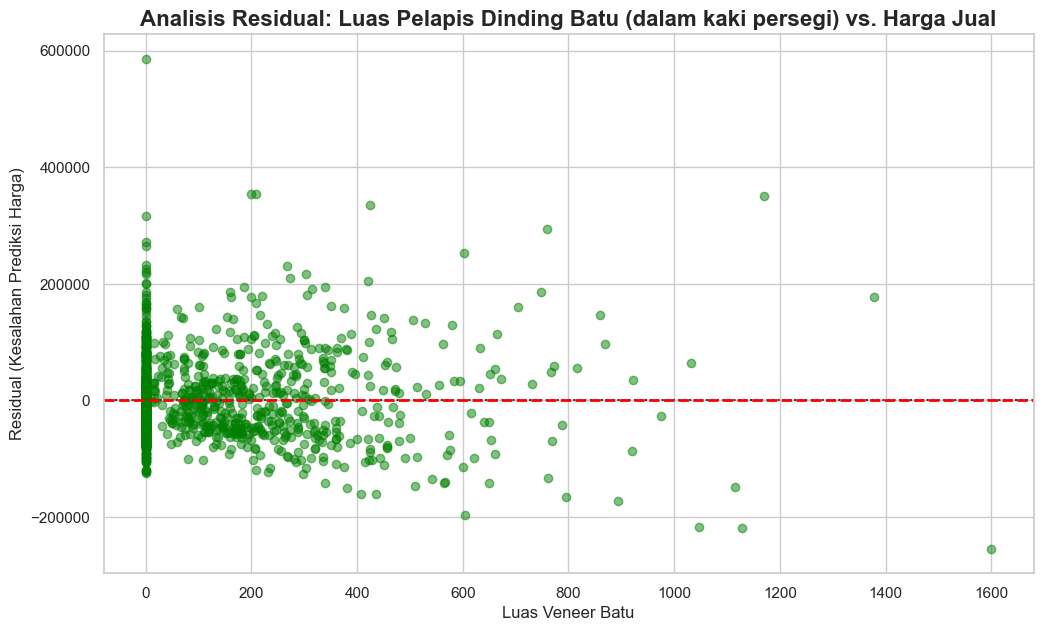

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Veneer_Batu',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Pelapis Dinding Batu (dalam kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Veneer Batu', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [26]:
data_latih.query('Luas_Veneer_Batu > 1500')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
297  298                   60               FV                   66.0   

     Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah Utilitas  \
297          7399        Pave       Pave            IR1          Lvl   AllPub   

     ... Luas_Kolam_Renang Kualitas_Kolam Pagar Fitur_Lain Nilai_Fitur_Lain  \
297  ...                 0            NaN   NaN        NaN                0   

    Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  Kondisi_Penjualan  Harga_Jual  
297             6          2007              WD             Normal      239000  

[1 rows x 81 columns]

298

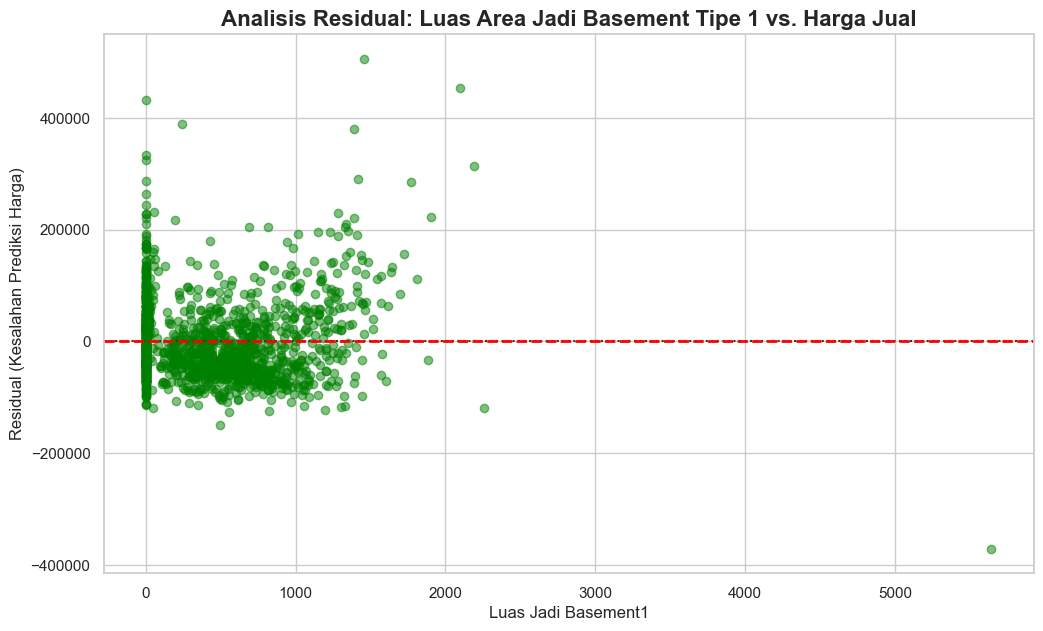

In [27]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Jadi_Basement1',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Area Jadi Basement Tipe 1 vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Jadi Basement1', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [28]:
data_latih.query('Luas_Jadi_Basement1 > 5000')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
1298  1299                   60               RL                  313.0   

      Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah  \
1298         63887        Pave        NaN            IR3          Bnk   

     Utilitas  ... Luas_Kolam_Renang Kualitas_Kolam Pagar Fitur_Lain  \
1298   AllPub  ...               480             Gd   NaN        NaN   

     Nilai_Fitur_Lain Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  \
1298                0             1          2008             New   

      Kondisi_Penjualan  Harga_Jual  
1298            Partial      160000  

[1 rows x 81 columns]

1299

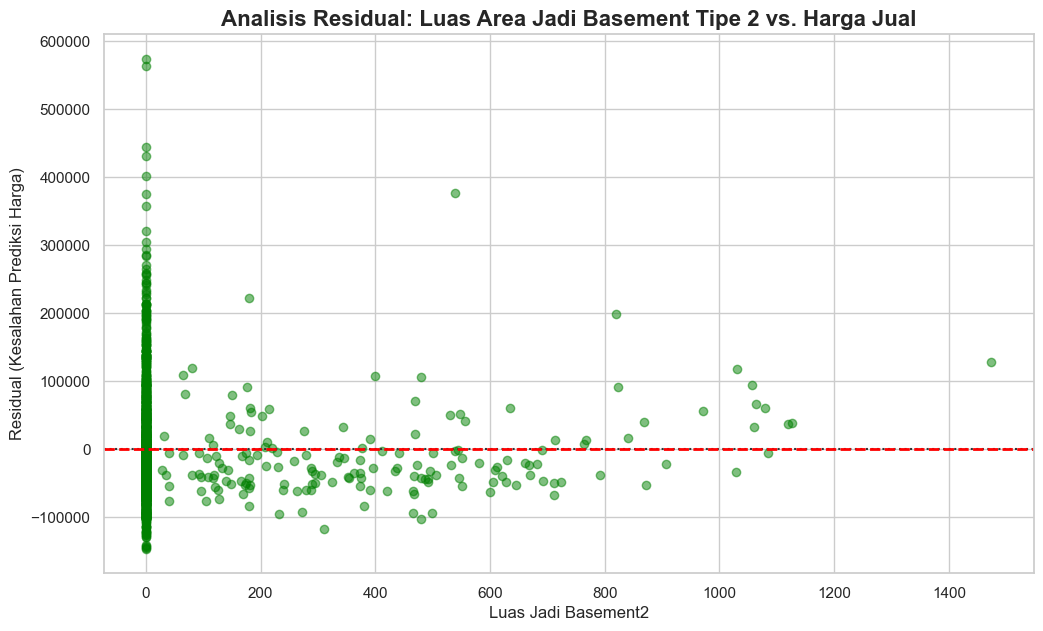

In [29]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Jadi_Basement2',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Area Jadi Basement Tipe 2 vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Jadi Basement2', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [30]:
data_latih.query('Luas_Jadi_Basement2 > 400 & Harga_Jual > 500000')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
440  441                   20               RL                  105.0   

     Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah Utilitas  \
440         15431        Pave        NaN            Reg          Lvl   AllPub   

     ... Luas_Kolam_Renang Kualitas_Kolam Pagar Fitur_Lain Nilai_Fitur_Lain  \
440  ...                 0            NaN   NaN        NaN                0   

    Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  Kondisi_Penjualan  Harga_Jual  
440             4          2009              WD             Normal      555000  

[1 rows x 81 columns]

441

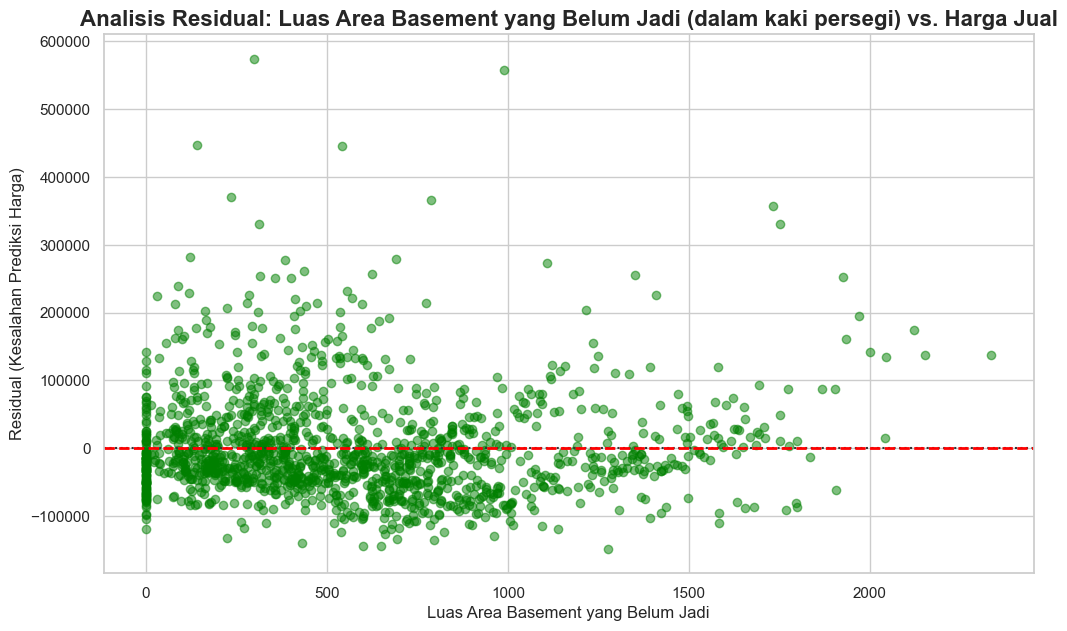

In [31]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Belum_Jadi_Basement',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Area Basement yang Belum Jadi (dalam kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Area Basement yang Belum Jadi', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

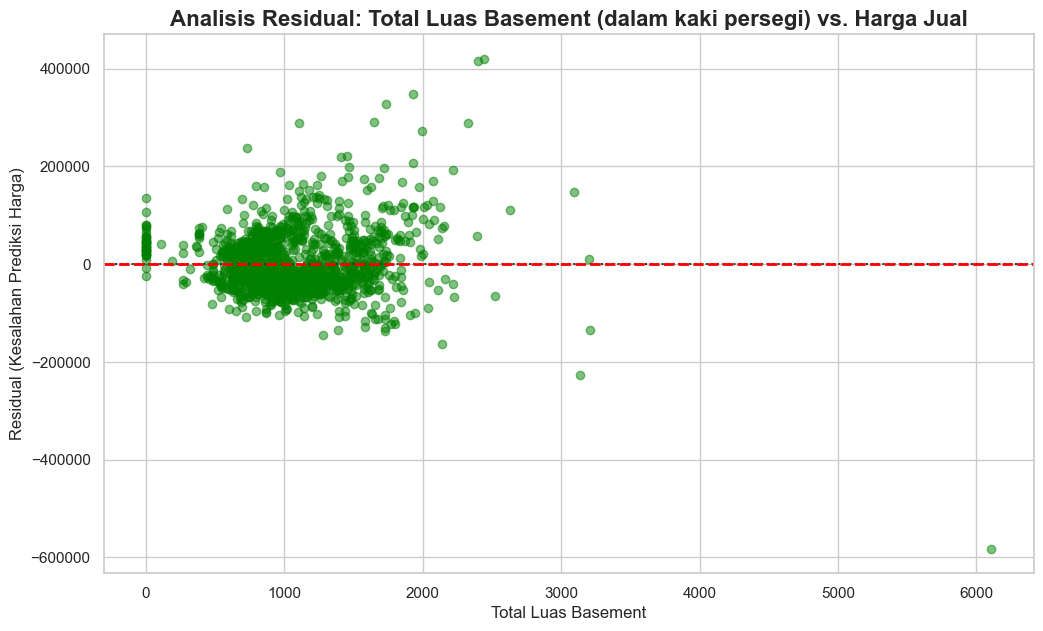

In [32]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Total_Luas_Basement',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Total Luas Basement (dalam kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Total Luas Basement', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [33]:
data_latih.query('Total_Luas_Basement > 5000')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
1298  1299                   60               RL                  313.0   

      Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah  \
1298         63887        Pave        NaN            IR3          Bnk   

     Utilitas  ... Luas_Kolam_Renang Kualitas_Kolam Pagar Fitur_Lain  \
1298   AllPub  ...               480             Gd   NaN        NaN   

     Nilai_Fitur_Lain Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  \
1298                0             1          2008             New   

      Kondisi_Penjualan  Harga_Jual  
1298            Partial      160000  

[1 rows x 81 columns]

1299

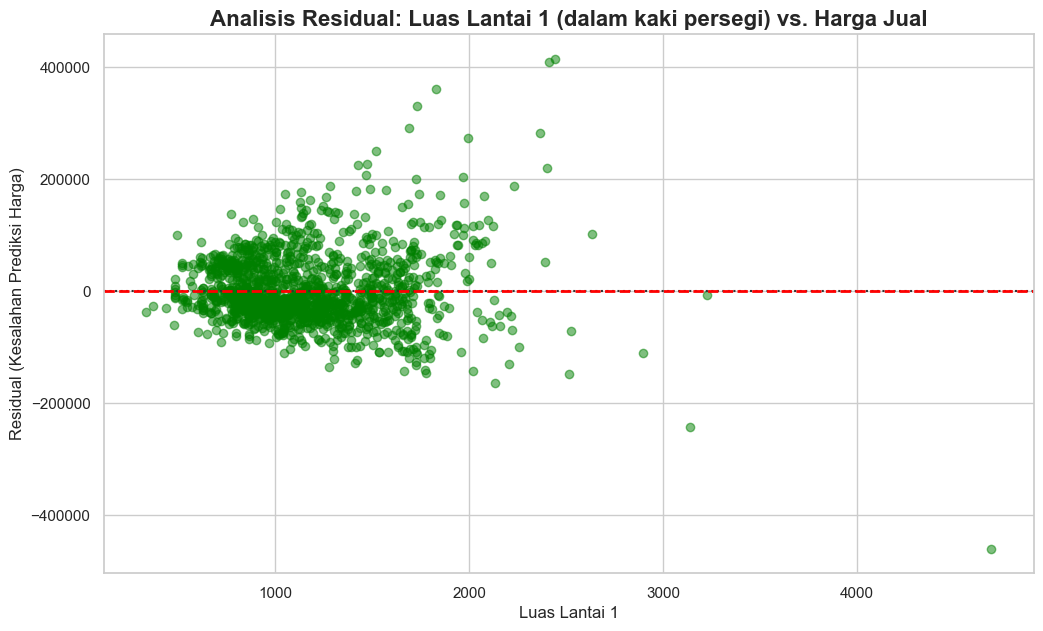

In [34]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Lantai1',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Lantai 1 (dalam kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Lantai 1', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

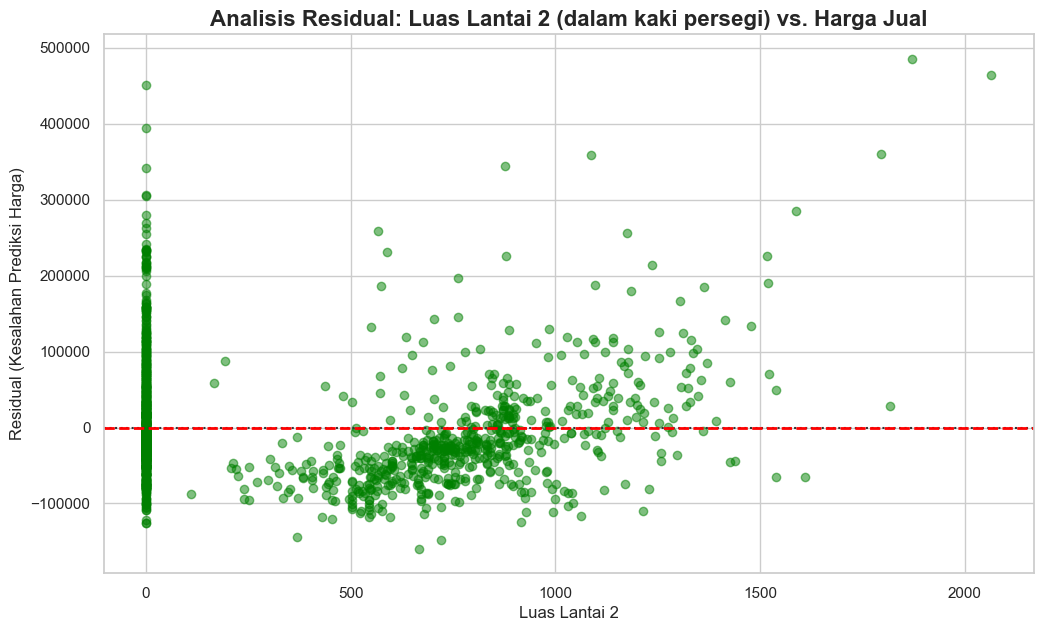

In [35]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Lantai2',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Lantai 2 (dalam kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Lantai 2', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

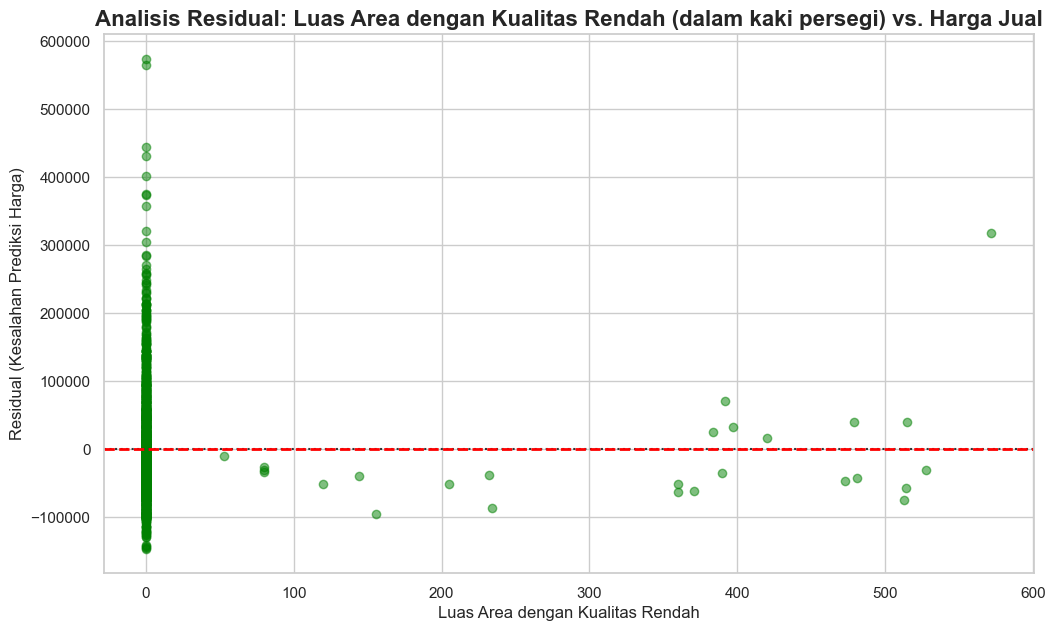

In [36]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Kualitas_Rendah',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Area dengan Kualitas Rendah (dalam kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Area dengan Kualitas Rendah', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [37]:
data_latih.query('Luas_Kualitas_Rendah > 500')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
88      89                   50          C (all)                  105.0   
170    171                   50               RM                    NaN   
185    186                   75               RM                   90.0   
635    636                  190               RH                   60.0   
1009  1010                   50               RL                   60.0   

      Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah  \
88            8470        Pave        NaN            IR1          Lvl   
170          12358        Pave        NaN            IR1          Lvl   
185          22950        Pave        NaN            IR2          Lvl   
635          10896        Pave       Pave            Reg          Bnk   
1009          6000        Pave        NaN            Reg          Lvl   

     Utilitas  ... Luas_Kolam_Renang Kualitas_Kolam  Pagar Fitur_Lain  \
88     AllPub  ...                 0            NaN  MnPrv        NaN   
170    AllPub  ...                 0            NaN    NaN        NaN   
185    AllPub  ...                 0            NaN  GdPrv        NaN   
635    AllPub  ...                 0            NaN    NaN        NaN   
1009   AllPub  ...                 0            NaN    NaN        NaN   

     Nilai_Fitur_Lain Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  \
88                  0            10          2009           ConLD   
170                 0             5          2007              WD   
185                 0             6          2006              WD   
635                 0             3          2007              WD   
1009                0             6          2006              WD   

      Kondisi_Penjualan  Harga_Jual  
88              Abnorml       85000  
170              Normal      128500  
185              Normal      475000  
635             Abnorml      200000  
1009             Normal      102000  

[5 rows x 81 columns]

186

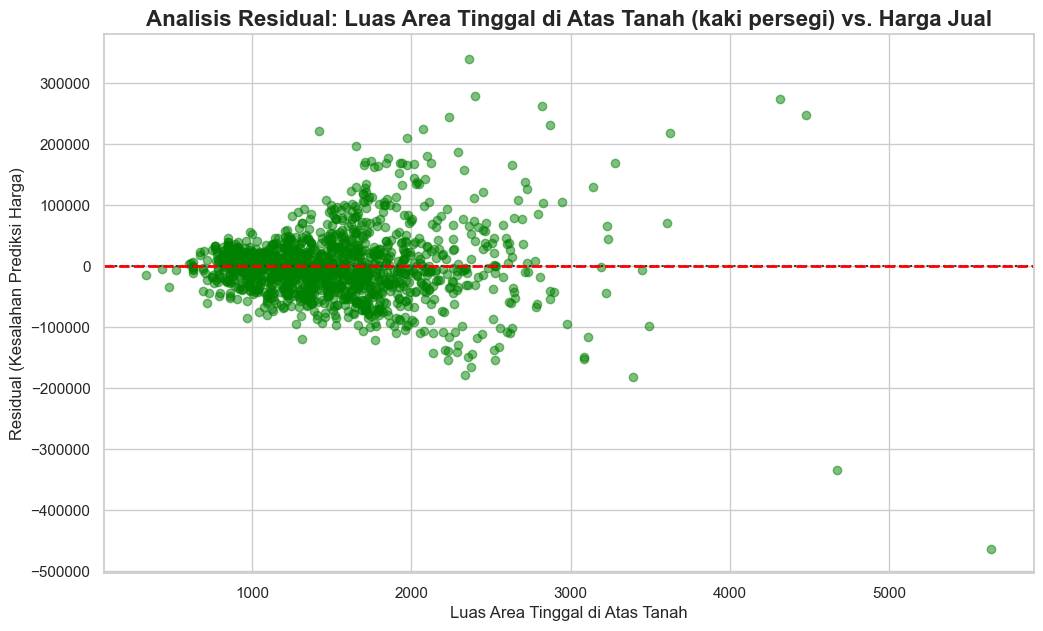

In [38]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Area_Tinggal',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Area Tinggal di Atas Tanah (kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Area Tinggal di Atas Tanah', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [39]:
data_latih.query('Luas_Area_Tinggal > 4400')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
523    524                   60               RL                  130.0   
1182  1183                   60               RL                  160.0   
1298  1299                   60               RL                  313.0   

      Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah  \
523          40094        Pave        NaN            IR1          Bnk   
1182         15623        Pave        NaN            IR1          Lvl   
1298         63887        Pave        NaN            IR3          Bnk   

     Utilitas  ... Luas_Kolam_Renang Kualitas_Kolam  Pagar Fitur_Lain  \
523    AllPub  ...                 0            NaN    NaN        NaN   
1182   AllPub  ...               555             Ex  MnPrv        NaN   
1298   AllPub  ...               480             Gd    NaN        NaN   

     Nilai_Fitur_Lain Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  \
523                 0            10          2007             New   
1182                0             7          2007              WD   
1298                0             1          2008             New   

      Kondisi_Penjualan  Harga_Jual  
523             Partial      184750  
1182            Abnorml      745000  
1298            Partial      160000  

[3 rows x 81 columns]

542, 1299

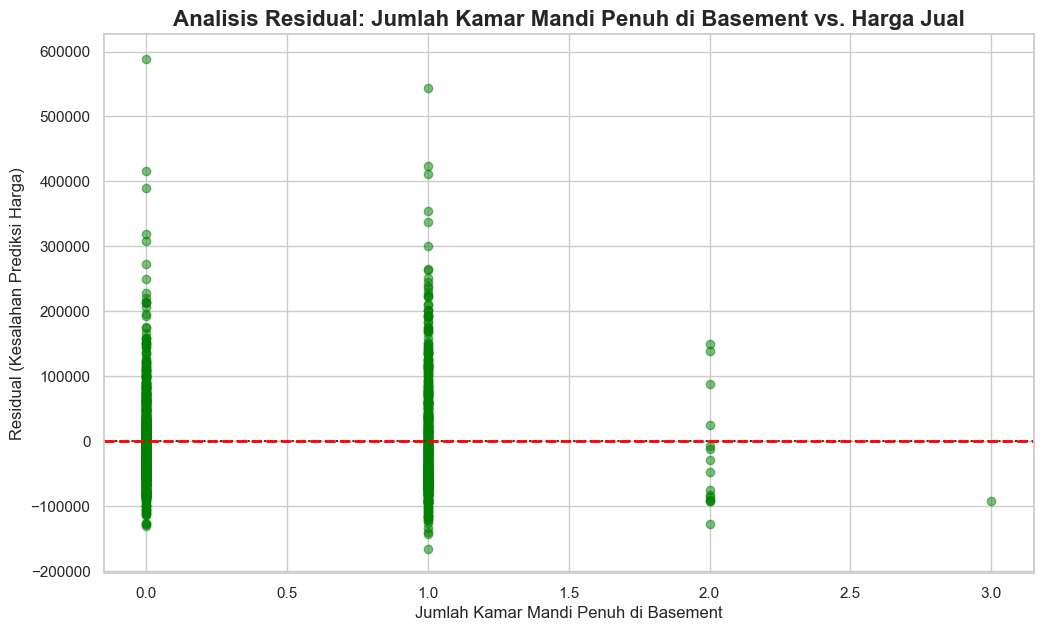

In [40]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='KamarMandi_Penuh_Basement',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Jumlah Kamar Mandi Penuh di Basement vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Kamar Mandi Penuh di Basement', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [41]:
data_latih.query('KamarMandi_Penuh_Basement == 3')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
738  739                   90               RL                   60.0   

     Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah Utilitas  \
738         10800        Pave        NaN            Reg          Lvl   AllPub   

     ... Luas_Kolam_Renang Kualitas_Kolam Pagar Fitur_Lain Nilai_Fitur_Lain  \
738  ...                 0            NaN   NaN        NaN                0   

    Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  Kondisi_Penjualan  Harga_Jual  
738             3          2009              WD             Alloca      179000  

[1 rows x 81 columns]

739

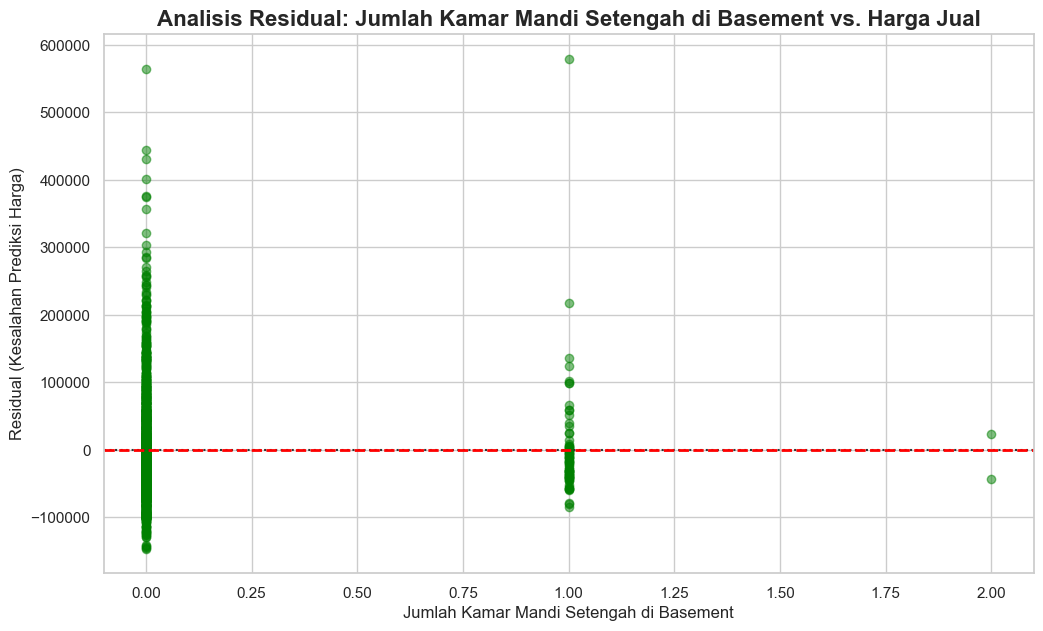

In [42]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='KamarMandi_Setengah_Basement',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Jumlah Kamar Mandi Setengah di Basement vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Kamar Mandi Setengah di Basement', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [43]:
pd.Series(stats.zscore(data_latih['KamarMandi_Setengah_Basement'])).unique()

array([-0.24106104,  3.94880935,  8.13867973])

Kolom ini berisi nilai diskrit (0, 1, 2).

Nilai 8.13 z-score = kemungkinan besar data outlier.

In [44]:
data_latih.query('KamarMandi_Setengah_Basement == 2')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
597  598                  120               RL                   53.0   
954  955                   90               RL                   35.0   

     Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah Utilitas  \
597          3922        Pave        NaN            Reg          Lvl   AllPub   
954          9400        Pave        NaN            IR1          Lvl   AllPub   

     ... Luas_Kolam_Renang Kualitas_Kolam Pagar Fitur_Lain Nilai_Fitur_Lain  \
597  ...                 0            NaN   NaN        NaN                0   
954  ...                 0            NaN   NaN        NaN                0   

    Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  Kondisi_Penjualan  Harga_Jual  
597             2          2007             New            Partial      194201  
954            10          2006              WD            AdjLand      127500  

[2 rows x 81 columns]

598, 955

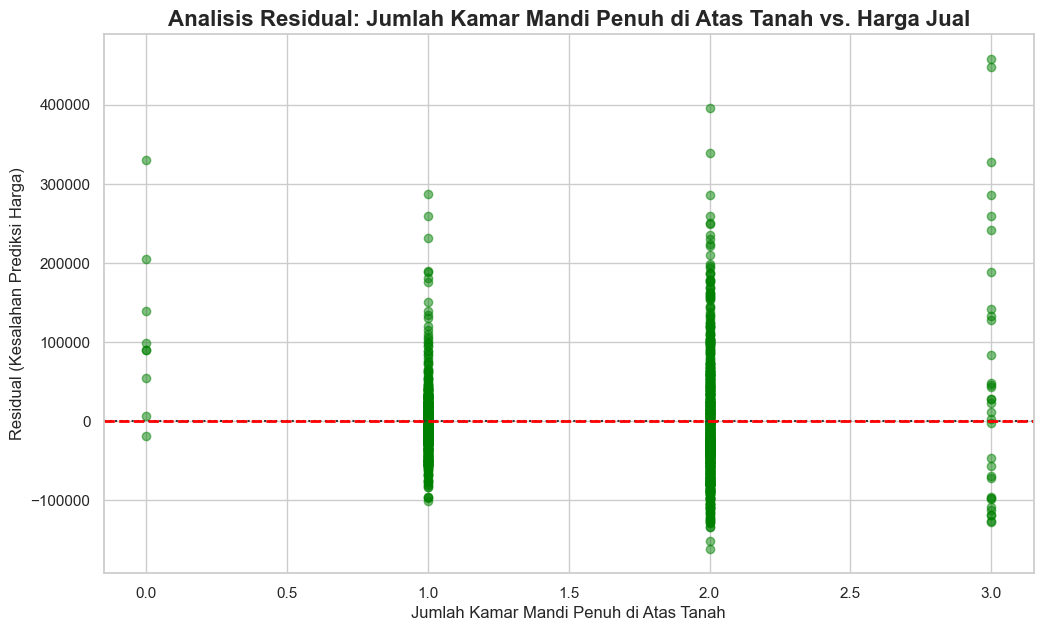

In [45]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='KamarMandi_Penuh_Atas',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Jumlah Kamar Mandi Penuh di Atas Tanah vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Kamar Mandi Penuh di Atas Tanah', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

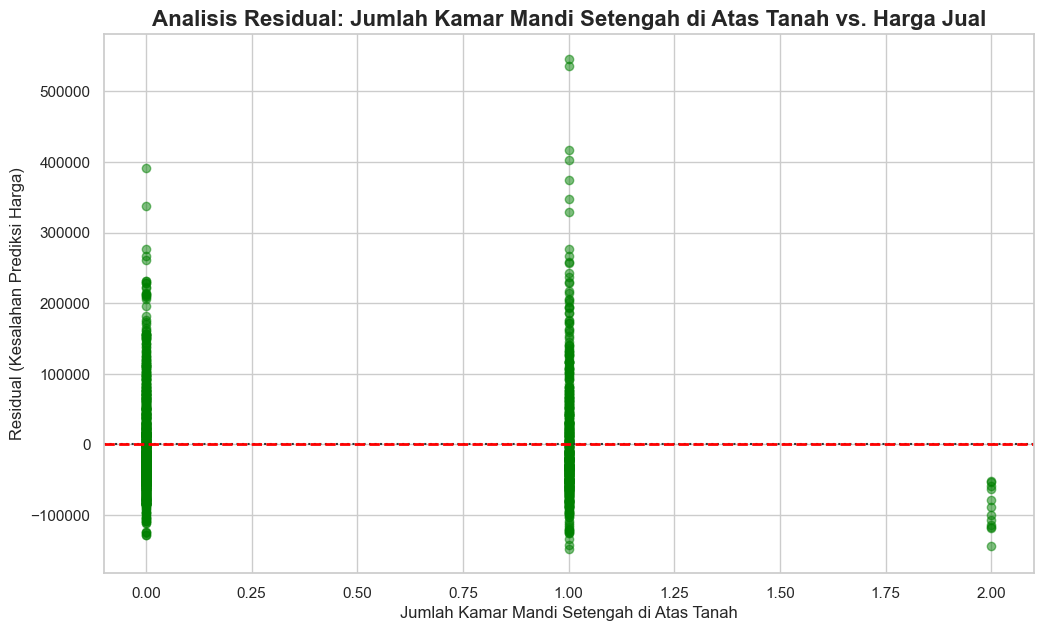

In [46]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='KamarMandi_Setengah_Atas',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Jumlah Kamar Mandi Setengah di Atas Tanah vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Kamar Mandi Setengah di Atas Tanah', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

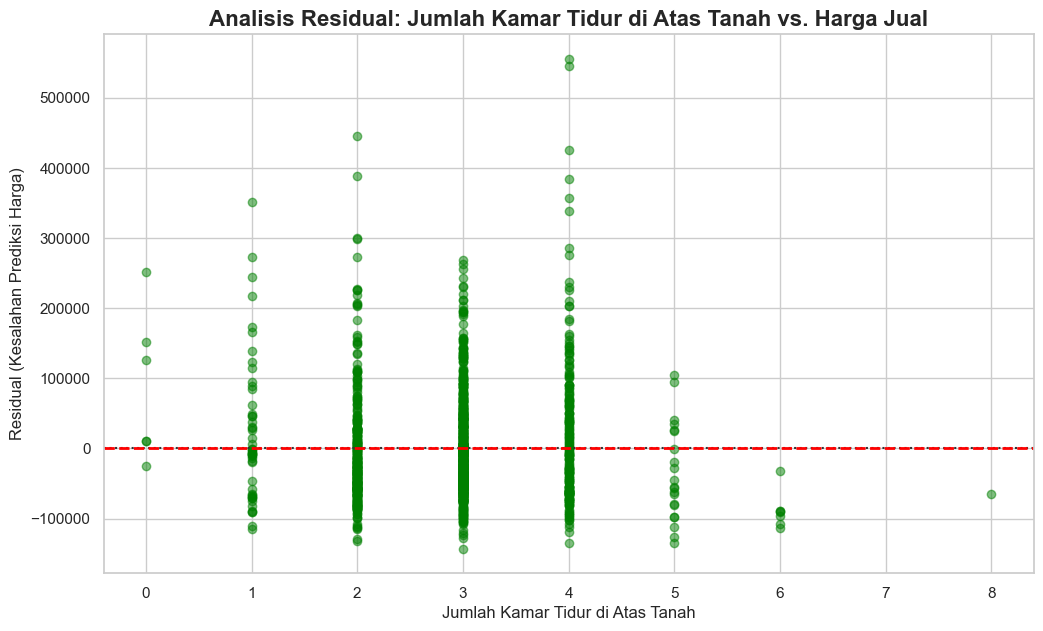

In [47]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Jumlah_Kamar_Tidur',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Jumlah Kamar Tidur di Atas Tanah vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Kamar Tidur di Atas Tanah', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [48]:
data_latih.query('Jumlah_Kamar_Tidur == 8')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
635  636                  190               RH                   60.0   

     Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah Utilitas  \
635         10896        Pave       Pave            Reg          Bnk   AllPub   

     ... Luas_Kolam_Renang Kualitas_Kolam Pagar Fitur_Lain Nilai_Fitur_Lain  \
635  ...                 0            NaN   NaN        NaN                0   

    Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  Kondisi_Penjualan  Harga_Jual  
635             3          2007              WD            Abnorml      200000  

[1 rows x 81 columns]

636

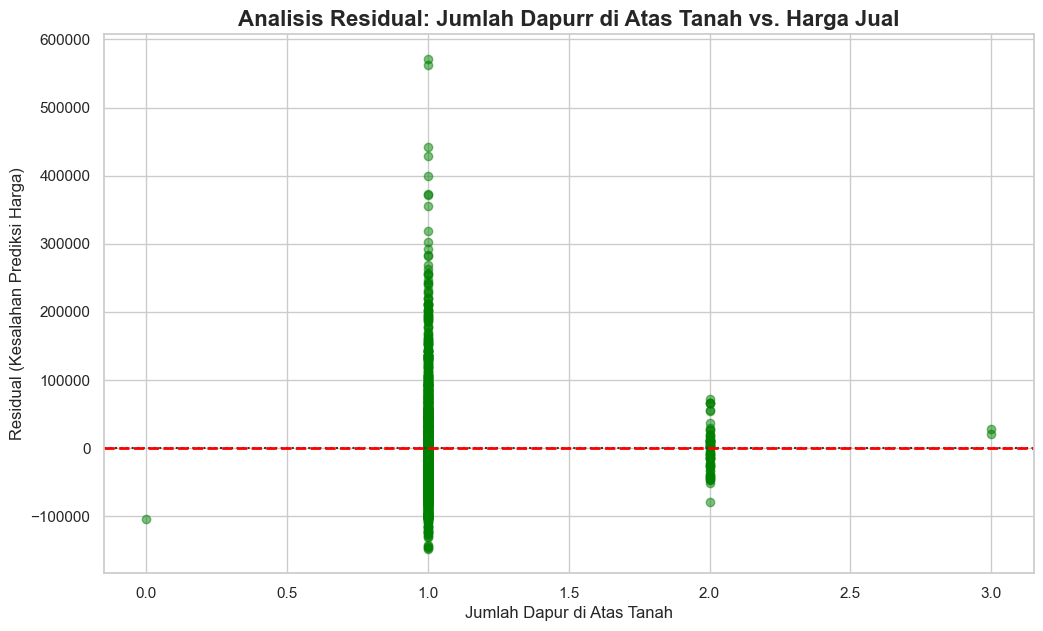

In [49]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Jumlah_Dapur',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Jumlah Dapurr di Atas Tanah vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Dapur di Atas Tanah', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [50]:
data_latih.query('Jumlah_Dapur == 3')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
48    49                  190               RM                   33.0   
809  810                   75               RM                   90.0   

     Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah Utilitas  \
48           4456        Pave        NaN            Reg          Lvl   AllPub   
809          8100        Pave        NaN            Reg          Lvl   AllPub   

     ... Luas_Kolam_Renang Kualitas_Kolam  Pagar Fitur_Lain Nilai_Fitur_Lain  \
48   ...                 0            NaN    NaN        NaN                0   
809  ...                 0            NaN  MnPrv        NaN                0   

    Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  Kondisi_Penjualan  Harga_Jual  
48              6          2009             New            Partial      113000  
809            11          2009              WD             Normal      106000  

[2 rows x 81 columns]

49, 810

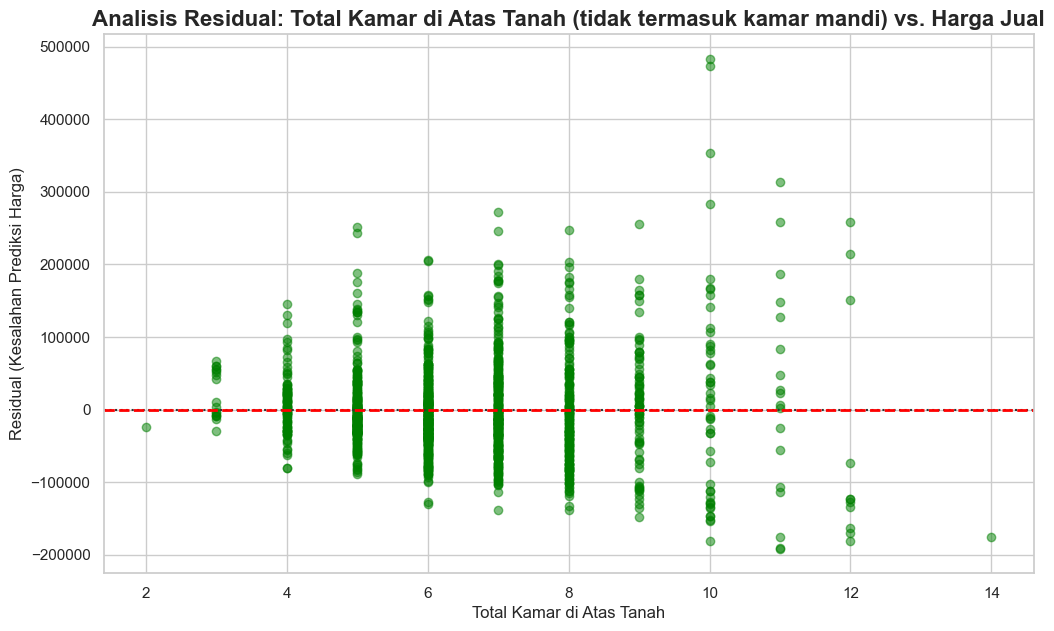

In [51]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Total_Kamar',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Total Kamar di Atas Tanah (tidak termasuk kamar mandi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Total Kamar di Atas Tanah', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [52]:
data_latih.query('Total_Kamar == 14')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
635  636                  190               RH                   60.0   

     Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah Utilitas  \
635         10896        Pave       Pave            Reg          Bnk   AllPub   

     ... Luas_Kolam_Renang Kualitas_Kolam Pagar Fitur_Lain Nilai_Fitur_Lain  \
635  ...                 0            NaN   NaN        NaN                0   

    Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  Kondisi_Penjualan  Harga_Jual  
635             3          2007              WD            Abnorml      200000  

[1 rows x 81 columns]

636

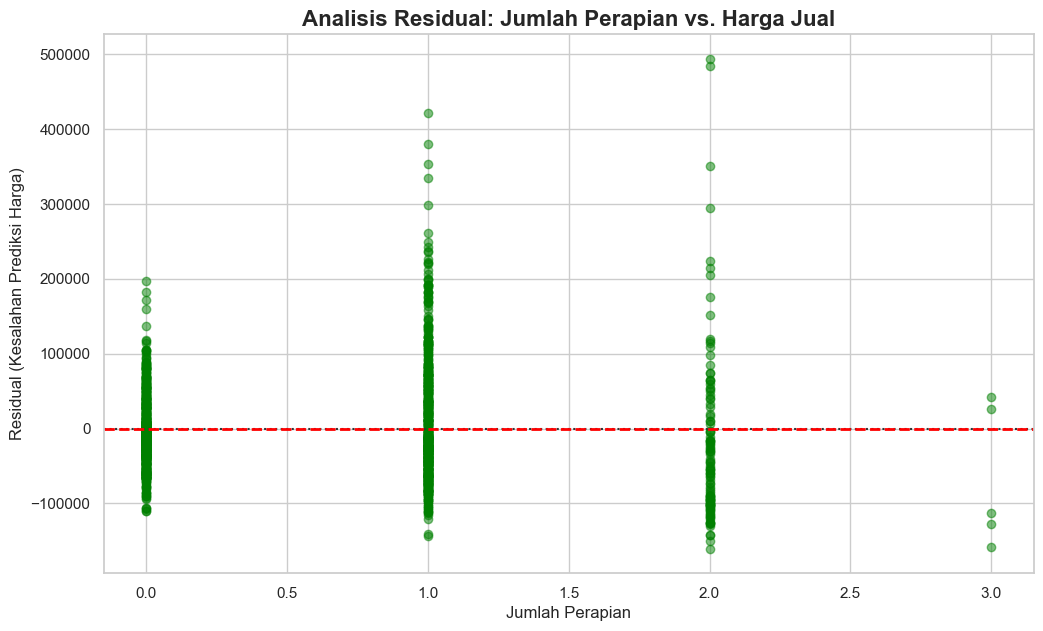

In [53]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Jumlah_Perapian',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Jumlah Perapian vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Perapian', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

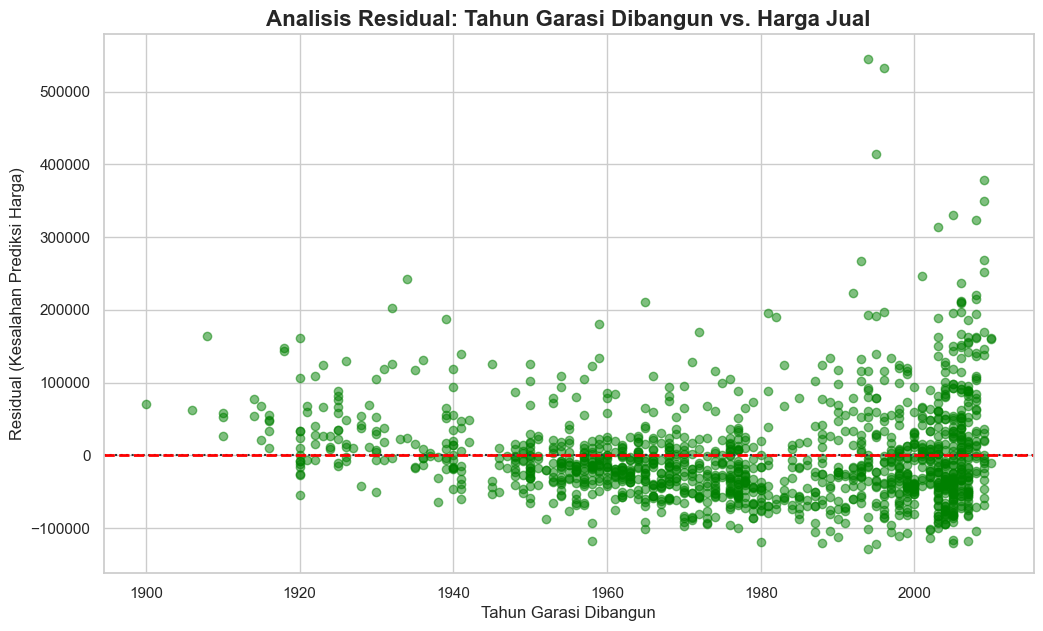

In [54]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Tahun_Garasi_Dibangun',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Tahun Garasi Dibangun vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Tahun Garasi Dibangun', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

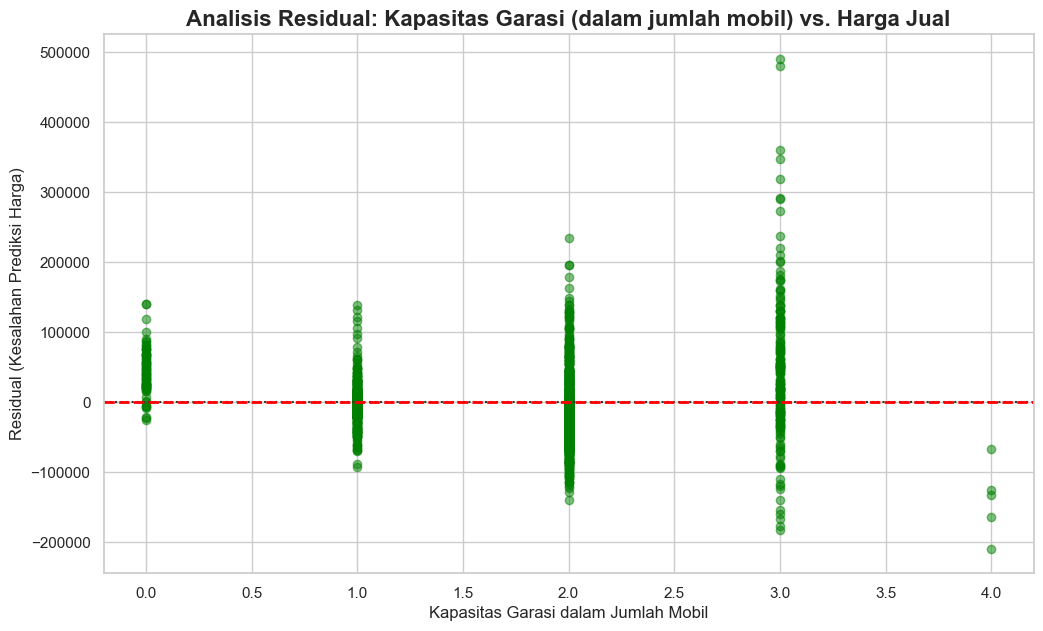

In [55]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Kapasitas_Mobil_Garasi',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Kapasitas Garasi (dalam jumlah mobil) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Kapasitas Garasi dalam Jumlah Mobil', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

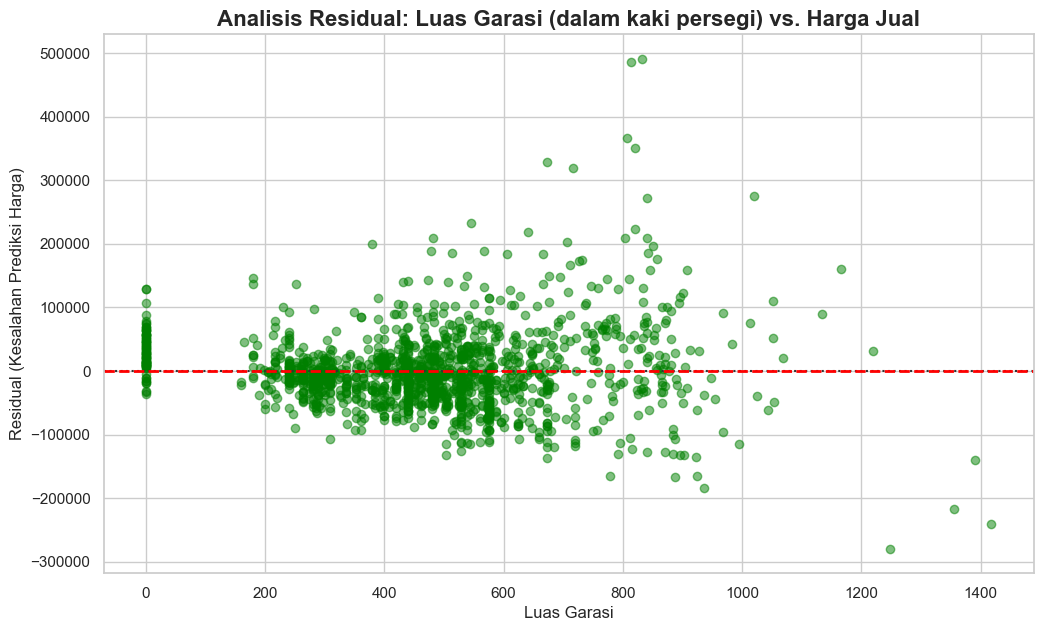

In [56]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Garasi',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Garasi (dalam kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Garasi', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [57]:
data_latih.query('Luas_Garasi > 1200')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
581    582                   20               RL                   98.0   
825    826                   20               RL                  114.0   
1061  1062                   30          C (all)                  120.0   
1190  1191                  190               RL                    NaN   
1298  1299                   60               RL                  313.0   

      Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah  \
581          12704        Pave        NaN            Reg          Lvl   
825          14803        Pave        NaN            Reg          Lvl   
1061         18000        Grvl        NaN            Reg          Low   
1190         32463        Pave        NaN            Reg          Low   
1298         63887        Pave        NaN            IR3          Bnk   

     Utilitas  ... Luas_Kolam_Renang Kualitas_Kolam Pagar Fitur_Lain  \
581    AllPub  ...                 0            NaN   NaN        NaN   
825    AllPub  ...                 0            NaN   NaN        NaN   
1061   AllPub  ...                 0            NaN   NaN       Shed   
1190   AllPub  ...                 0            NaN   NaN        NaN   
1298   AllPub  ...               480             Gd   NaN        NaN   

     Nilai_Fitur_Lain Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  \
581                 0             8          2009             New   
825                 0             6          2008             New   
1061              560             8          2008           ConLD   
1190                0             3          2007              WD   
1298                0             1          2008             New   

      Kondisi_Penjualan  Harga_Jual  
581             Partial      253293  
825             Partial      385000  
1061             Normal       81000  
1190             Normal      168000  
1298            Partial      160000  

[5 rows x 81 columns]

1062, 1191

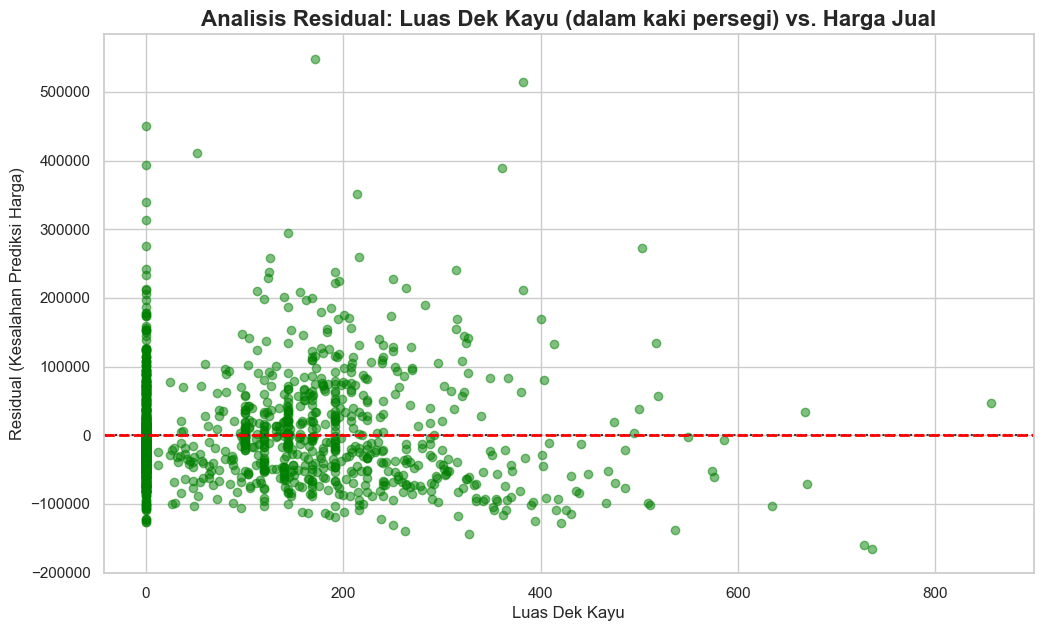

In [58]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Dek_Kayu',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Dek Kayu (dalam kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Dek Kayu', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

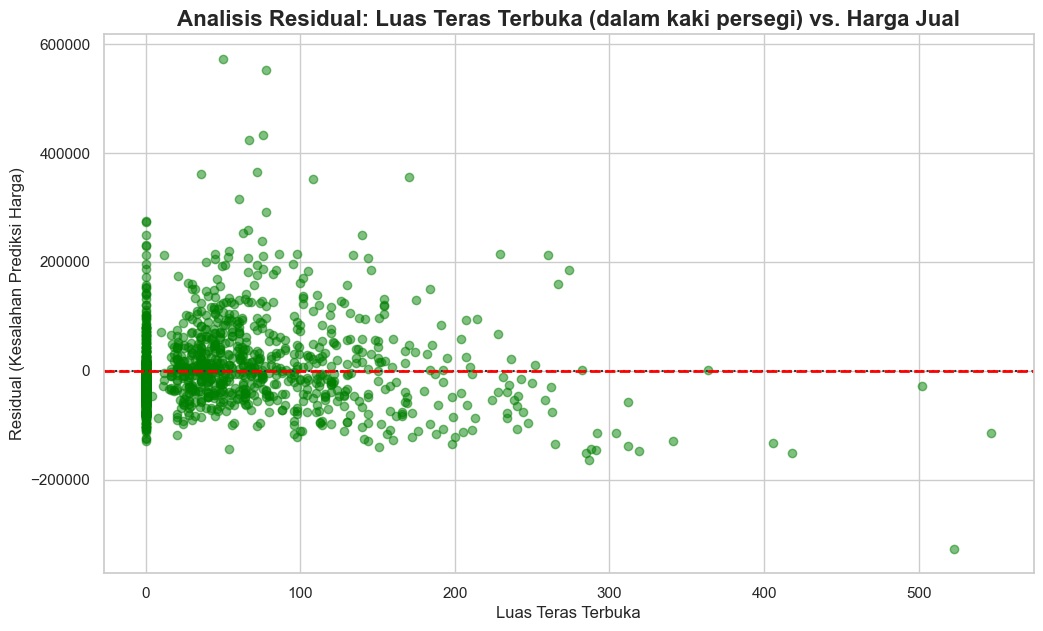

In [59]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Teras_Terbuka',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Teras Terbuka (dalam kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Teras Terbuka', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [60]:
data_latih.query('Luas_Teras_Terbuka > 500')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
495    496                   30          C (all)                   60.0   
583    584                   75               RM                   75.0   
1328  1329                   50               RM                   60.0   

      Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah  \
495           7879        Pave        NaN            Reg          Lvl   
583          13500        Pave        NaN            Reg          Lvl   
1328         10440        Pave       Grvl            Reg          Lvl   

     Utilitas  ... Luas_Kolam_Renang Kualitas_Kolam  Pagar Fitur_Lain  \
495    AllPub  ...                 0            NaN   GdWo        NaN   
583    AllPub  ...                 0            NaN    NaN        NaN   
1328   AllPub  ...                 0            NaN  MnPrv       Shed   

     Nilai_Fitur_Lain Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  \
495                 0            11          2009              WD   
583                 0             7          2008              WD   
1328             1150             6          2008              WD   

      Kondisi_Penjualan  Harga_Jual  
495             Abnorml       34900  
583              Normal      325000  
1328             Normal      256000  

[3 rows x 81 columns]

496

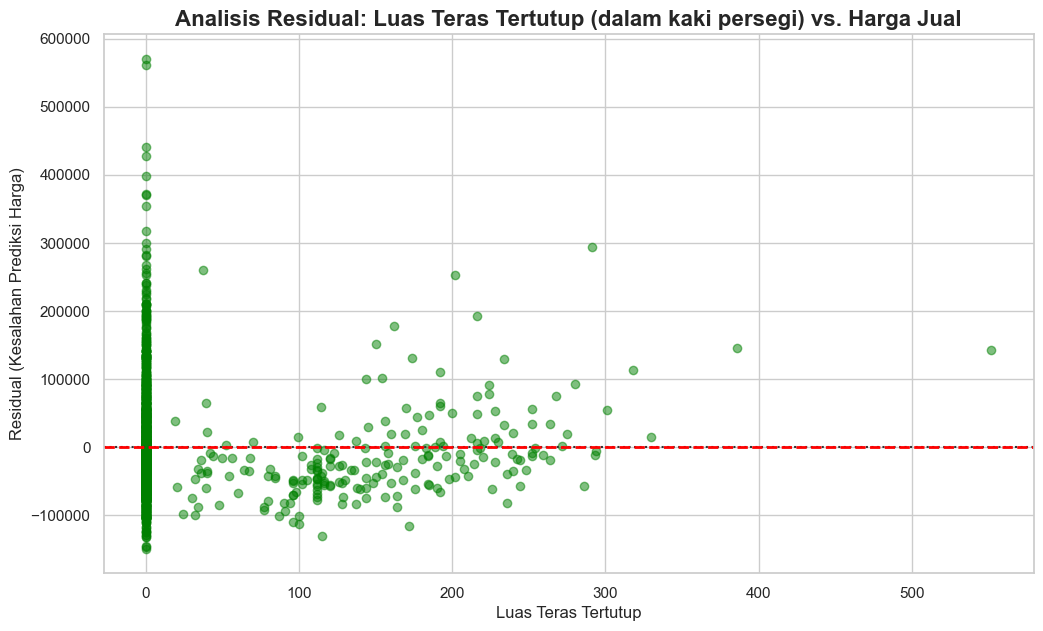

In [61]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Teras_Tertutup',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Teras Tertutup (dalam kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Teras Tertutup', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [62]:
data_latih  .query('Luas_Teras_Tertutup > 500')

Id  Tipe_Kelas_Bangunan Klasifikasi_Zona  Panjang_Depan_Kavling  \
197  198                   75               RL                  174.0   

     Luas_Kavling Akses_Jalan Akses_Gang Bentuk_Kavling Kontur_Tanah Utilitas  \
197         25419        Pave        NaN            Reg          Lvl   AllPub   

     ... Luas_Kolam_Renang Kualitas_Kolam  Pagar Fitur_Lain Nilai_Fitur_Lain  \
197  ...               512             Ex  GdPrv        NaN                0   

    Bulan_Terjual Tahun_Terjual  Tipe_Penjualan  Kondisi_Penjualan  Harga_Jual  
197             3          2006              WD            Abnorml      235000  

[1 rows x 81 columns]

198

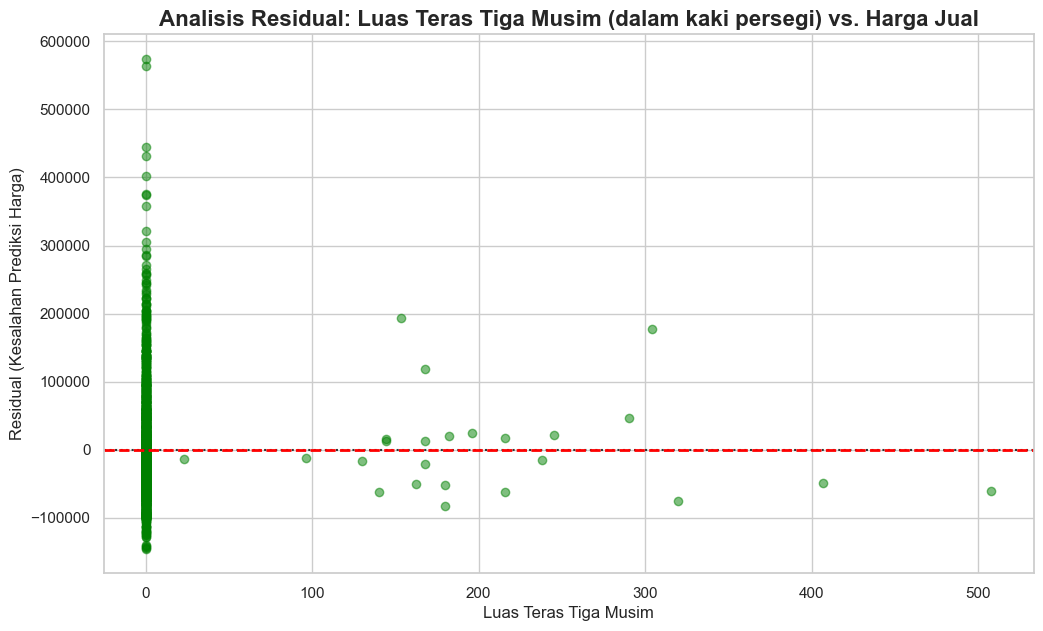

In [63]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Teras_3_Musim',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Teras Tiga Musim (dalam kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Teras Tiga Musim', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

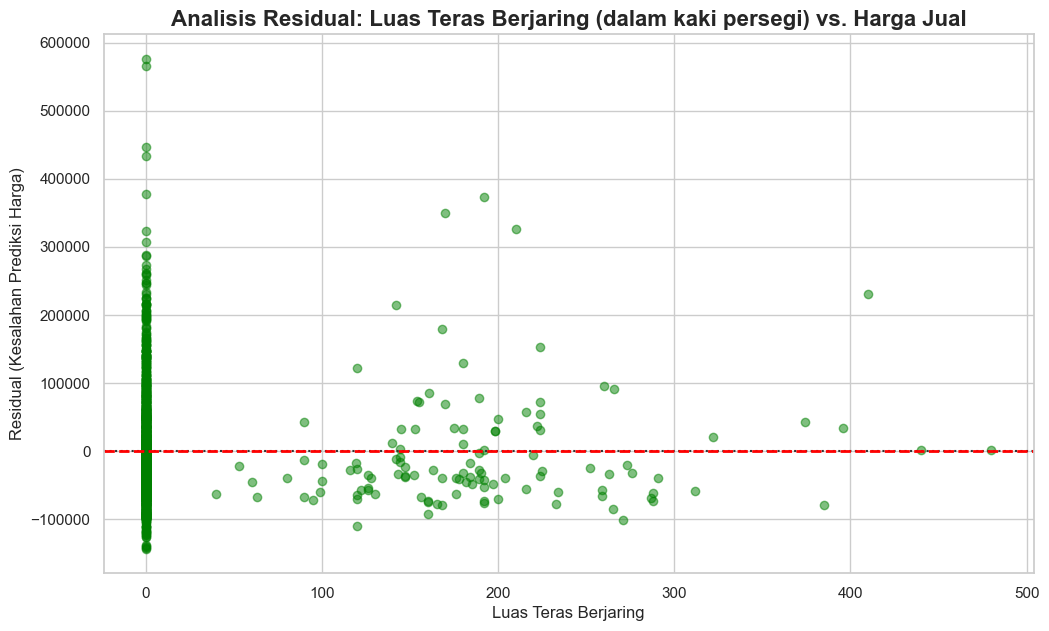

In [64]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Teras_Berjaring',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Teras Berjaring (dalam kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Teras Berjaring', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

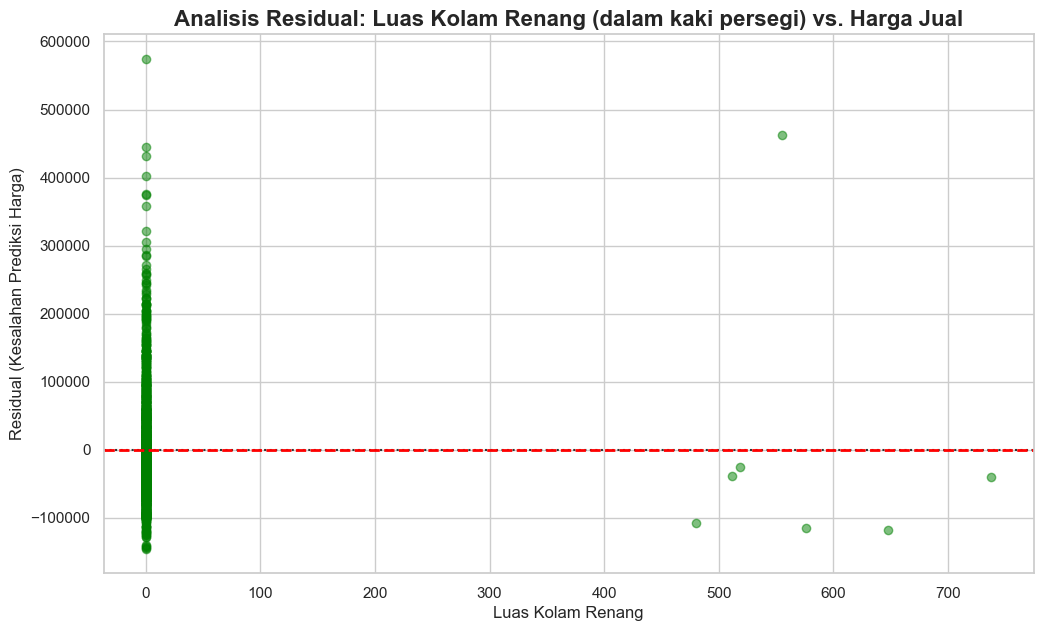

In [65]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.residplot(
    x='Luas_Kolam_Renang',
    y='Harga_Jual',
    data=data_latih,
    scatter_kws={'alpha': 0.5, 'color': 'green'}
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Analisis Residual: Luas Kolam Renang (dalam kaki persegi) vs. Harga Jual', fontsize=16, fontweight='bold')
plt.xlabel('Luas Kolam Renang', fontsize=12)
plt.ylabel('Residual (Kesalahan Prediksi Harga)', fontsize=12)
plt.show()

In [66]:
nilai_nilai = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]

In [67]:
data_latih = data_latih[data_latih.Id.isin(nilai_nilai) == False]

In [68]:
pd.DataFrame(data_latih.isnull().sum().sort_values(ascending=False)).head(20)

0
Kualitas_Kolam         1435
Fitur_Lain             1388
Akses_Gang             1350
Pagar                  1162
Tipe_Veneer_Batu        861
Kualitas_Perapian       684
Panjang_Depan_Kavling   255
Kualitas_Garasi          76
Finishing_Garasi         76
Tipe_Garasi              76
Tahun_Garasi_Dibangun    76
Kondisi_Garasi           76
Tipe_Jadi_Basement2      38
Eksposur_Basement        38
Kondisi_Basement         37
Kualitas_Basement        37
Tipe_Jadi_Basement1      37
Luas_Veneer_Batu          8
Kelistrikan               1
Kondisi2                  0

In [69]:
data_latih['Fitur_Lain'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [70]:
data_latih['Akses_Gang'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [71]:
data_latih['Akses_Gang'] = data_latih['Akses_Gang'].fillna('No')
data_uji['Akses_Gang']   = data_uji['Akses_Gang'].fillna('No')
# Mengisi nilai kosong pada kolom 'Akses_Gang' dengan string 'No'
# Sebelumnya, data_latih dibuat dari potongan DataFrame lain, sehingga perlu dipastikan sebagai salinan utuh (pakai .copy()).
# Hal ini untuk menghindari SettingWithCopyWarning dan memastikan perubahan benar-benar diterapkan.

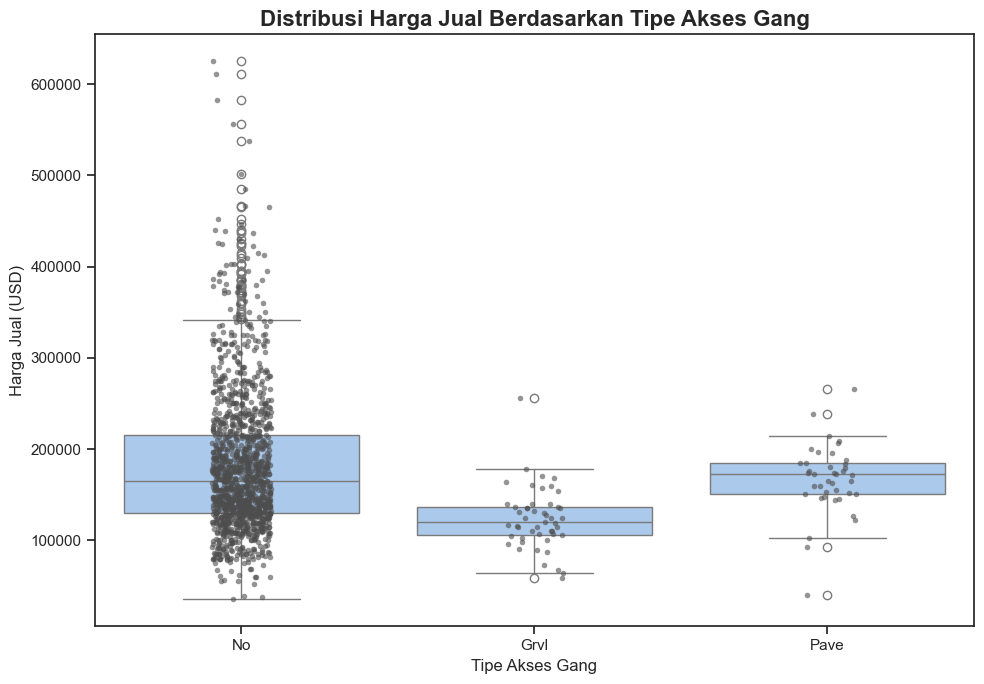

In [72]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Akses_Gang",
    y="Harga_Jual" # <-- TYPO DIPERBAIKI
)
sns.stripplot(
    data=data_latih,
    x="Akses_Gang",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Tipe Akses Gang", fontsize=16, fontweight='bold')
plt.xlabel("Tipe Akses Gang", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [73]:
data_latih['Pagar'].unique()
# Kualitas Pagar

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [74]:
# Mengisi nilai kosong pada kolom 'Pagar'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

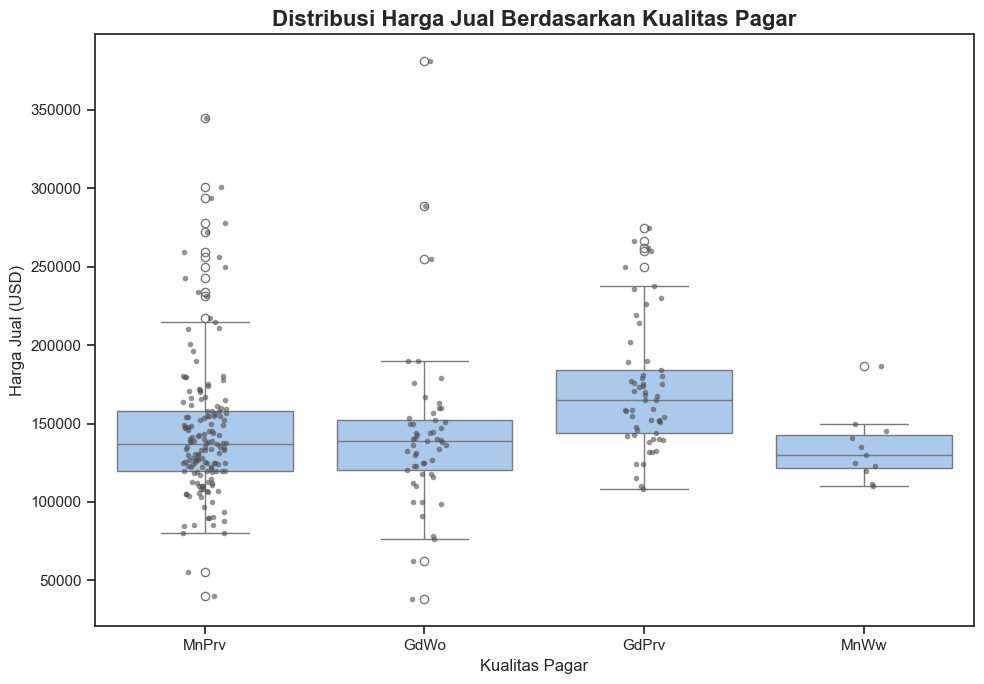

In [75]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Pagar",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Pagar",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Kualitas Pagar", fontsize=16, fontweight='bold')
plt.xlabel("Kualitas Pagar", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [76]:
data_latih['Tipe_Veneer_Batu'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [77]:
# Mengisi nilai kosong pada kolom 'Tipe_Veneer_Batu'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.
# Luas_Veneer_Batu (numeric) akan diimputasi oleh pipeline_numerik.

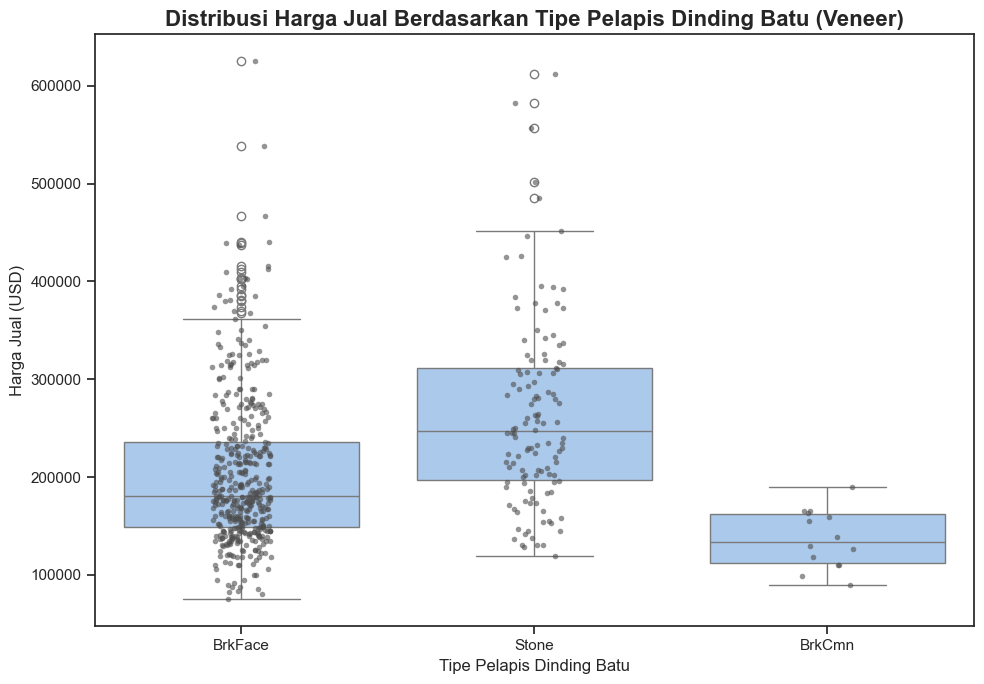

In [78]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Tipe_Veneer_Batu",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Tipe_Veneer_Batu",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Tipe Pelapis Dinding Batu (Veneer)", fontsize=16, fontweight='bold')
plt.xlabel("Tipe Pelapis Dinding Batu", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

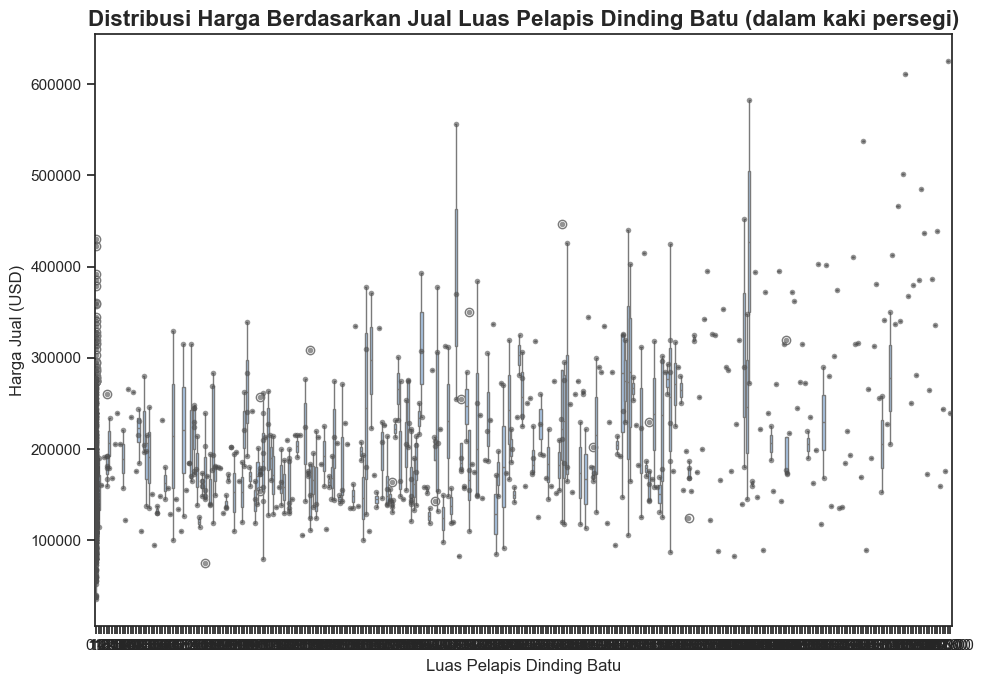

In [79]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Luas_Veneer_Batu",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Luas_Veneer_Batu",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Berdasarkan Jual Luas Pelapis Dinding Batu (dalam kaki persegi)", fontsize=16, fontweight='bold')
plt.xlabel("Luas Pelapis Dinding Batu", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [80]:
data_latih['Kualitas_Perapian'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [81]:
# Mengisi nilai kosong pada kolom 'Kualitas_Perapian'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

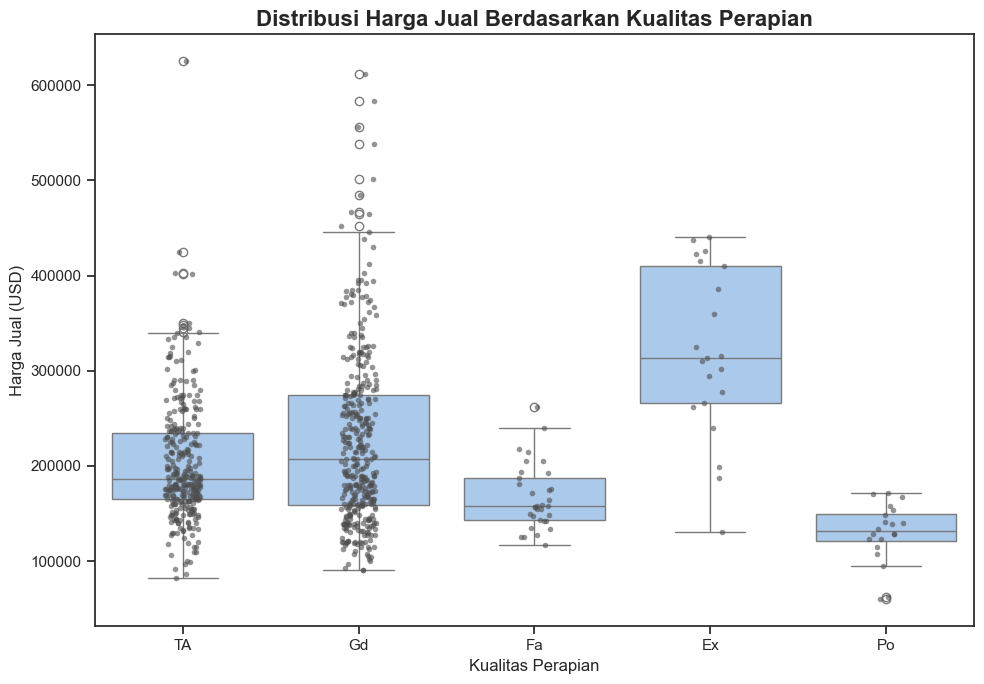

In [82]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Kualitas_Perapian",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Kualitas_Perapian",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Kualitas Perapian", fontsize=16, fontweight='bold')
plt.xlabel("Kualitas Perapian", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

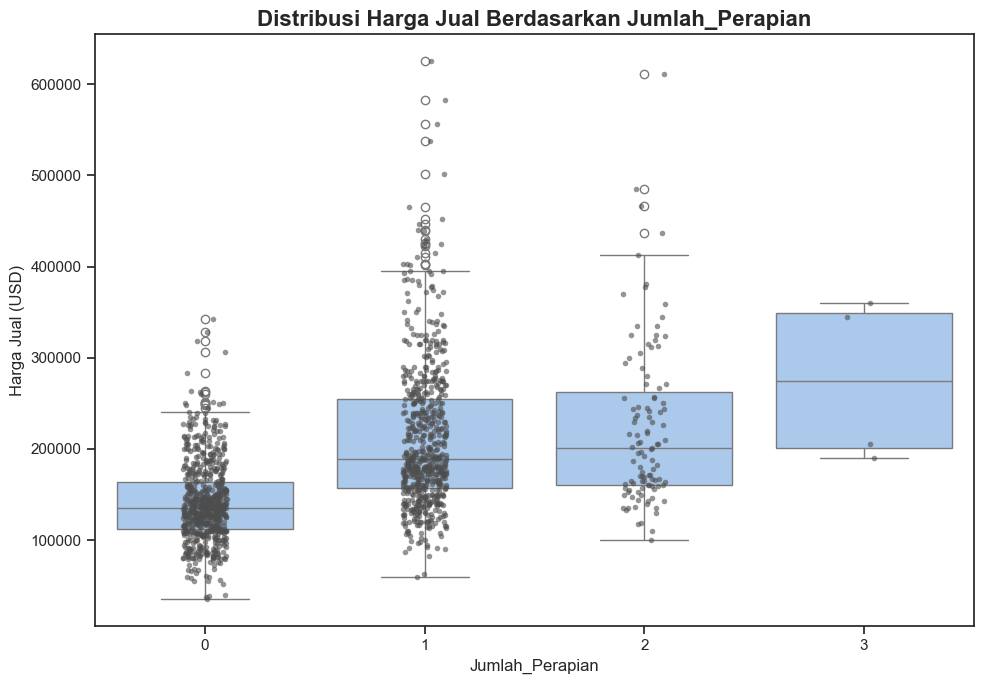

In [83]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Jumlah_Perapian",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Jumlah_Perapian",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Jumlah_Perapian", fontsize=16, fontweight='bold')
plt.xlabel("Jumlah_Perapian", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [84]:
# Mengisi nilai kosong pada kolom 'Panjang_Depan_Kavling'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

In [85]:
data_latih['Tahun_Garasi_Dibangun'].corr(data_latih['Tahun_Dibangun'])

np.float64(0.8289827595060575)

Nilai 0.8289 tersebut adalah koefisien korelasi Pearson, yang mengukur seberapa

kuat hubungan linear (garis lurus) antara dua variabel.

Berarti ini menunjukkan ada kaitan yang kuat antara Tahun garasi dibangun dan tahun dibangun bangunan itu sendiri

In [86]:
data_latih.columns

Index(['Id', 'Tipe_Kelas_Bangunan', 'Klasifikasi_Zona',
       'Panjang_Depan_Kavling', 'Luas_Kavling', 'Akses_Jalan', 'Akses_Gang',
       'Bentuk_Kavling', 'Kontur_Tanah', 'Utilitas', 'Konfigurasi_Kavling',
       'Kemiringan_Tanah', 'Lingkungan', 'Kondisi1', 'Kondisi2',
       'Tipe_Bangunan', 'Gaya_Rumah', 'Kualitas_Keseluruhan',
       'Kondisi_Keseluruhan', 'Tahun_Dibangun', 'Tahun_Renovasi', 'Gaya_Atap',
       'Material_Atap', 'Eksterior1', 'Eksterior2', 'Tipe_Veneer_Batu',
       'Luas_Veneer_Batu', 'Kualitas_Eksterior', 'Kondisi_Eksterior',
       'Fondasi', 'Kualitas_Basement', 'Kondisi_Basement', 'Eksposur_Basement',
       'Tipe_Jadi_Basement1', 'Luas_Jadi_Basement1', 'Tipe_Jadi_Basement2',
       'Luas_Jadi_Basement2', 'Luas_Belum_Jadi_Basement',
       'Total_Luas_Basement', 'Pemanas', 'Kualitas_Pemanas', 'AC_Sentral',
       'Kelistrikan', 'Luas_Lantai1', 'Luas_Lantai2', 'Luas_Kualitas_Rendah',
       'Luas_Area_Tinggal', 'KamarMandi_Penuh_Basement',
       'KamarMandi_

In [87]:
data_latih['Kondisi_Garasi'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [88]:
# Mengisi nilai kosong pada kolom 'Kondisi_Garasi'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

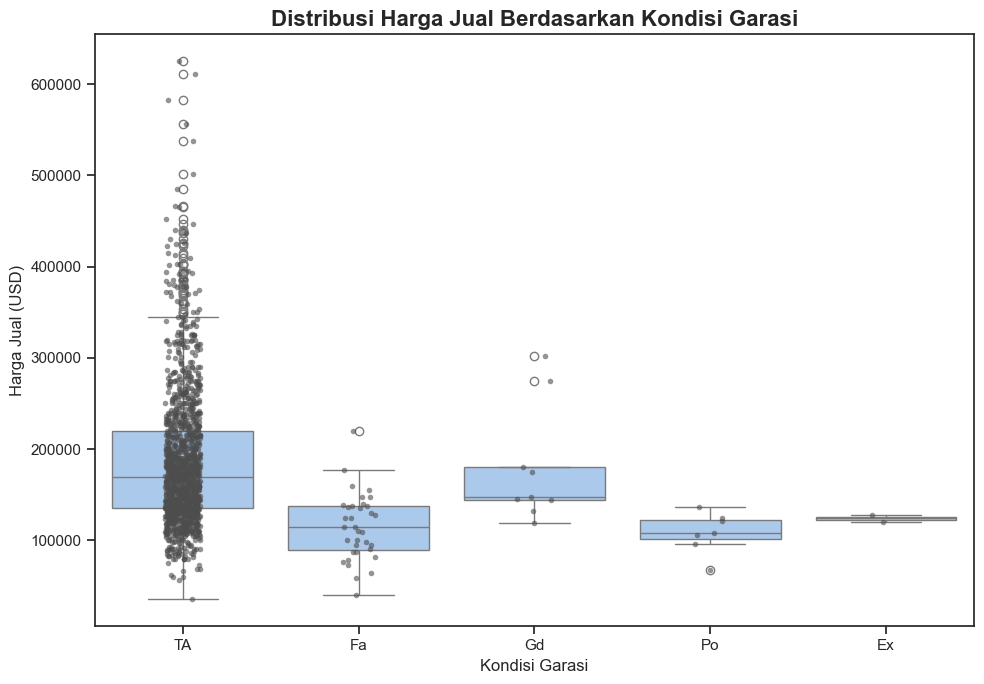

In [89]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Kondisi_Garasi",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Kondisi_Garasi",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Kondisi Garasi", fontsize=16, fontweight='bold')
plt.xlabel("Kondisi Garasi", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [90]:
# Mengisi nilai kosong pada kolom 'Tipe_Garasi'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

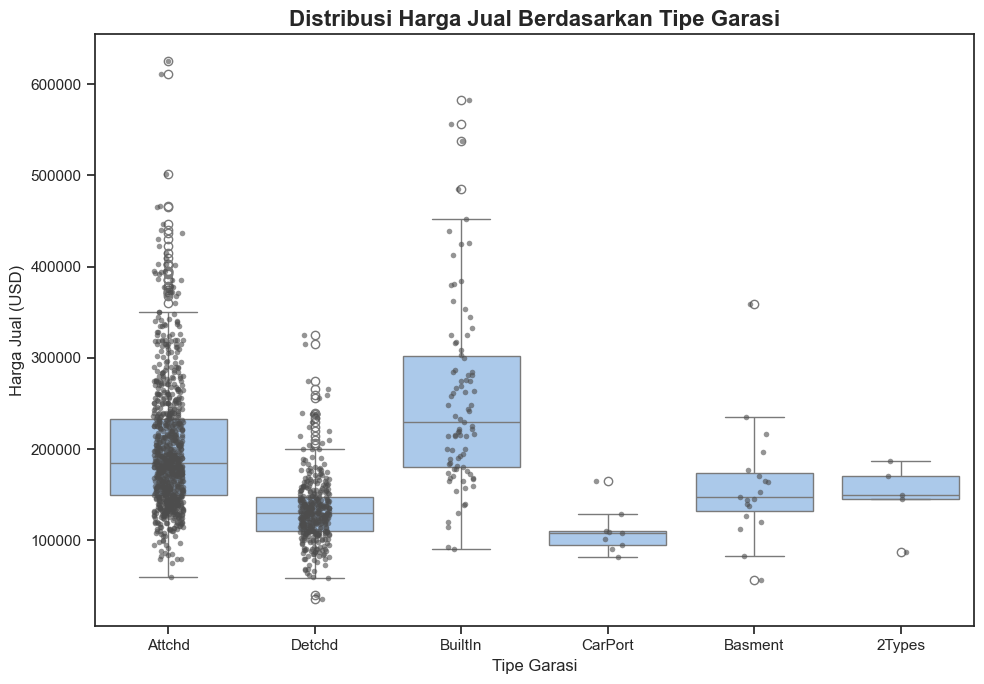

In [91]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Tipe_Garasi",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Tipe_Garasi",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Tipe Garasi", fontsize=16, fontweight='bold')
plt.xlabel("Tipe Garasi", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [92]:
# Mengisi nilai kosong pada kolom 'Finishing_Garasi'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

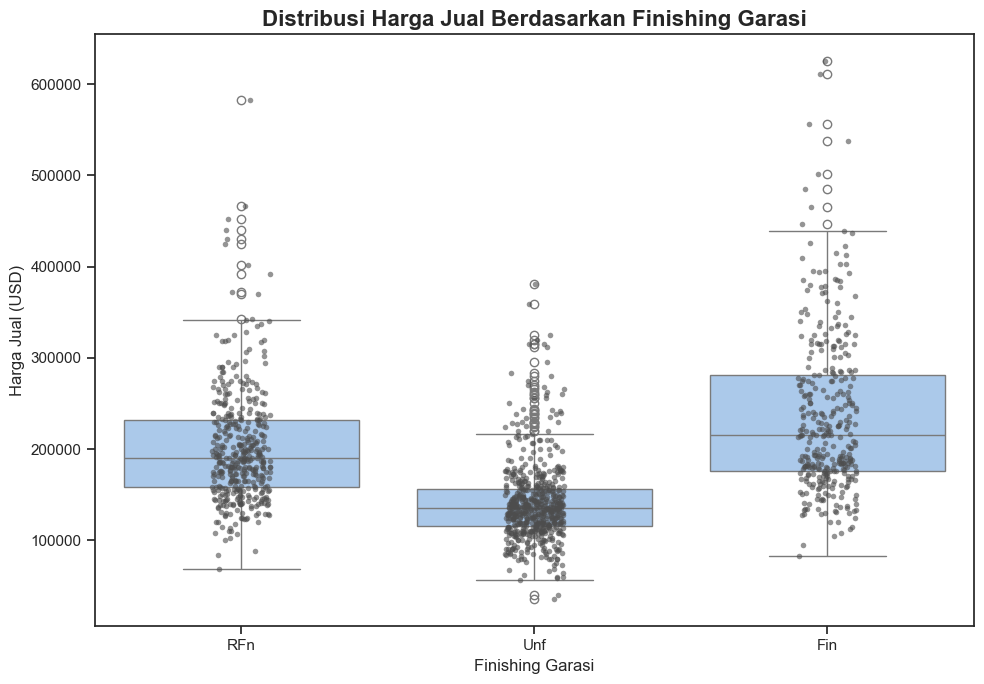

In [93]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Finishing_Garasi",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Finishing_Garasi",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Finishing Garasi", fontsize=16, fontweight='bold')
plt.xlabel("Finishing Garasi", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [94]:
# Mengisi nilai kosong pada kolom 'Kualitas_Garasi'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

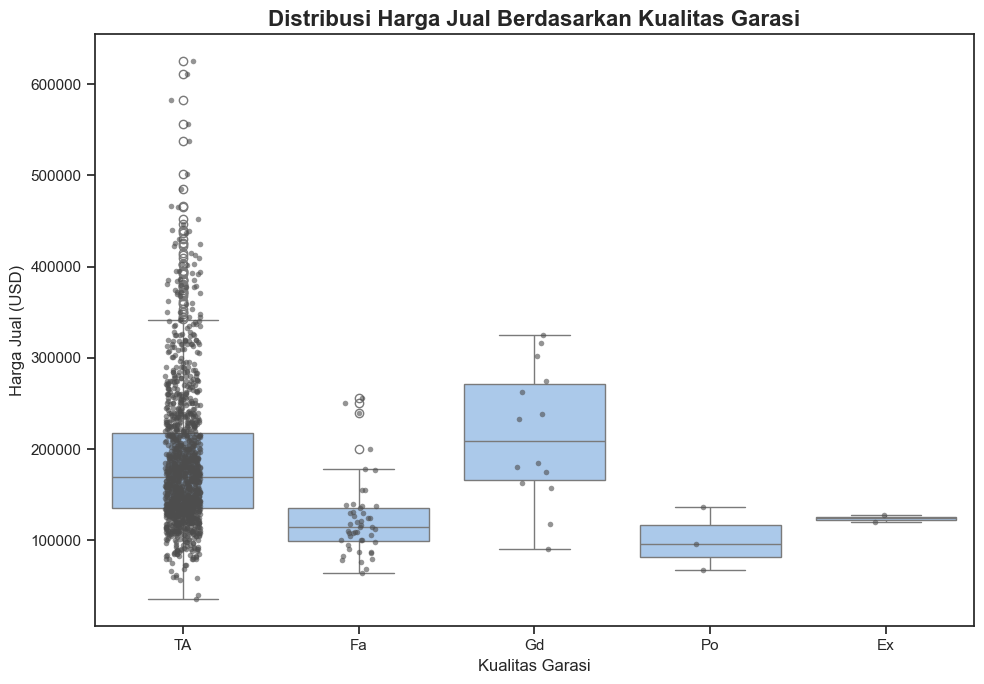

In [95]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Kualitas_Garasi",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Kualitas_Garasi",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Kualitas Garasi", fontsize=16, fontweight='bold')
plt.xlabel("Kualitas Garasi", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [96]:
data_latih['Tipe_Jadi_Basement2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [97]:
# Mengisi nilai kosong pada kolom 'Tipe_Jadi_Basement2'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

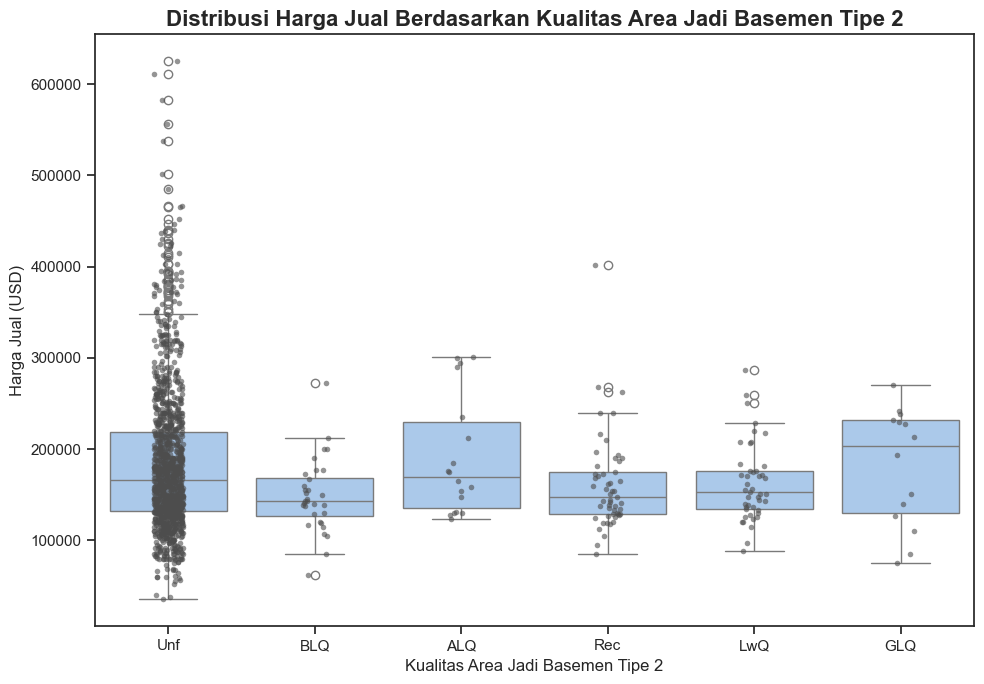

In [98]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Tipe_Jadi_Basement2",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Tipe_Jadi_Basement2",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Kualitas Area Jadi Basemen Tipe 2", fontsize=16, fontweight='bold')
plt.xlabel("Kualitas Area Jadi Basemen Tipe 2", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [99]:
data_latih['Eksposur_Basement'].unique()
# Eksposur Dinding Basement (ke taman/cahaya)

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [100]:
# Mengisi nilai kosong pada kolom 'Eksposur_Basement'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

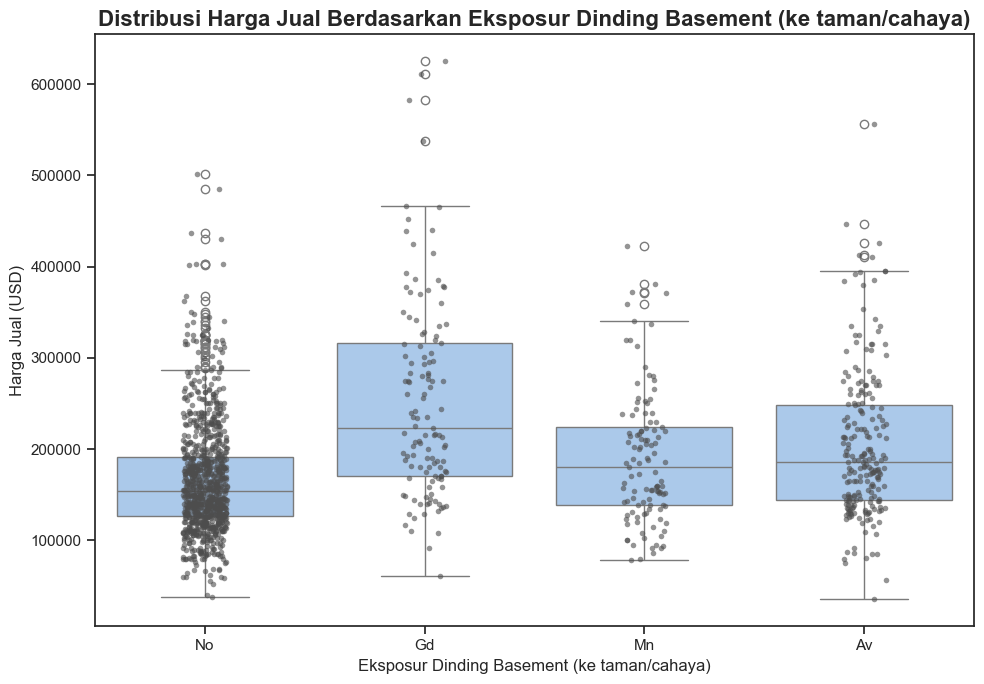

In [101]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Eksposur_Basement",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Eksposur_Basement",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Eksposur Dinding Basement (ke taman/cahaya)", fontsize=16, fontweight='bold')
plt.xlabel("Eksposur Dinding Basement (ke taman/cahaya)", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [102]:
data_latih['Kualitas_Basement'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [103]:
# Mengisi nilai kosong pada kolom 'Kualitas_Basement'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

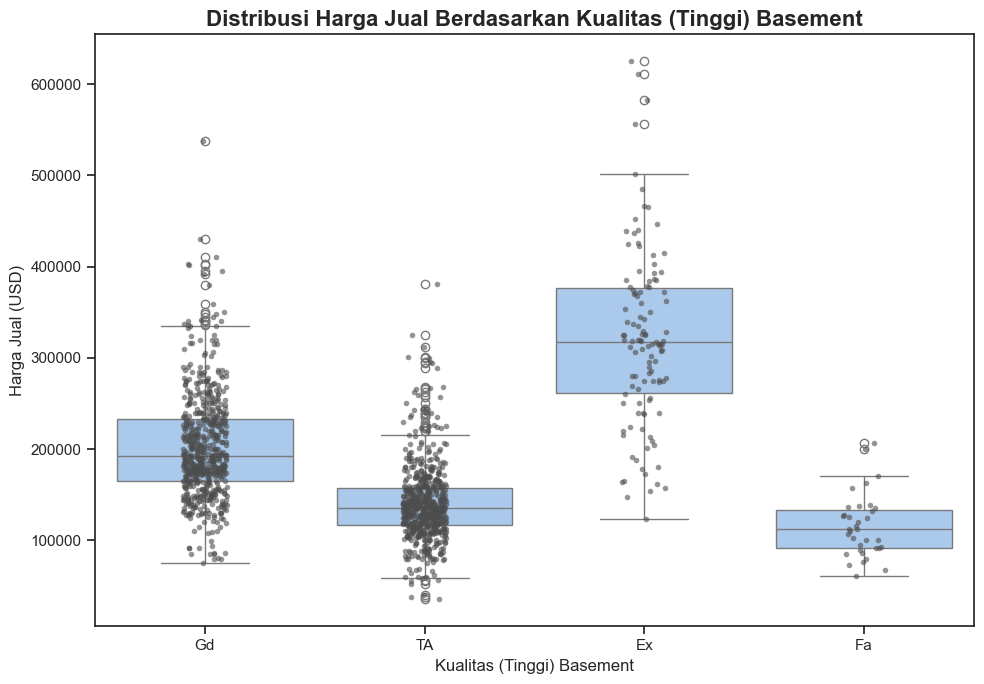

In [104]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Kualitas_Basement",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Kualitas_Basement",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Kualitas (Tinggi) Basement", fontsize=16, fontweight='bold')
plt.xlabel("Kualitas (Tinggi) Basement", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [105]:
data_latih['Kondisi_Basement'].unique()
# Kondisi Umum Basement

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [106]:
# Mengisi nilai kosong pada kolom 'Kondisi_Basement'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

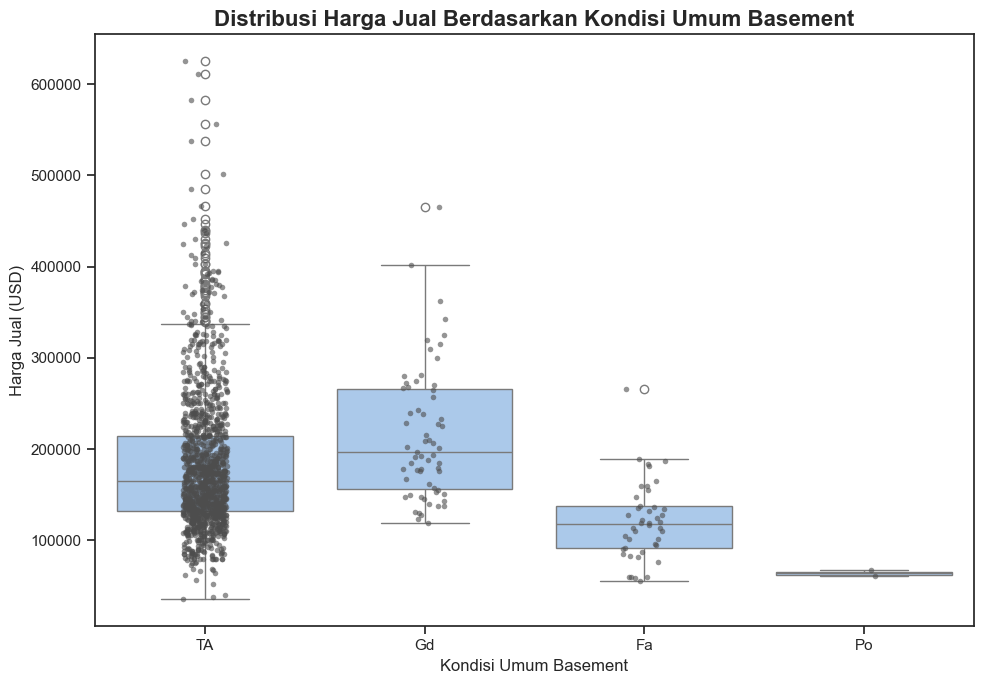

In [107]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Kondisi_Basement",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Kondisi_Basement",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Kondisi Umum Basement", fontsize=16, fontweight='bold')
plt.xlabel("Kondisi Umum Basement", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [108]:
data_latih['Tipe_Jadi_Basement1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [109]:
# Mengisi nilai kosong pada kolom 'Tipe_Jadi_Basement1'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

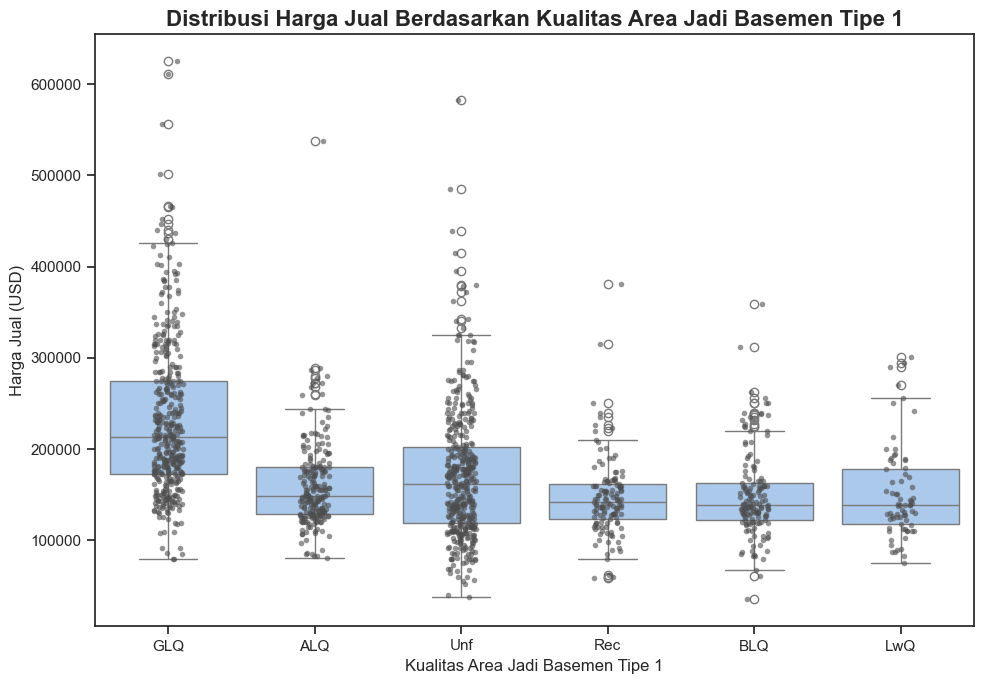

In [110]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=data_latih,
    x="Tipe_Jadi_Basement1",
    y="Harga_Jual"
)
sns.stripplot(
    data=data_latih,
    x="Tipe_Jadi_Basement1",
    y="Harga_Jual",
    jitter=True,
    color=".3", # Warna abu-abu gelap untuk titik
    size=4,
    alpha=0.6
)
plt.title("Distribusi Harga Jual Berdasarkan Kualitas Area Jadi Basemen Tipe 1", fontsize=16, fontweight='bold')
plt.xlabel("Kualitas Area Jadi Basemen Tipe 1", fontsize=12)
plt.ylabel("Harga Jual (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [111]:
data_latih.columns

Index(['Id', 'Tipe_Kelas_Bangunan', 'Klasifikasi_Zona',
       'Panjang_Depan_Kavling', 'Luas_Kavling', 'Akses_Jalan', 'Akses_Gang',
       'Bentuk_Kavling', 'Kontur_Tanah', 'Utilitas', 'Konfigurasi_Kavling',
       'Kemiringan_Tanah', 'Lingkungan', 'Kondisi1', 'Kondisi2',
       'Tipe_Bangunan', 'Gaya_Rumah', 'Kualitas_Keseluruhan',
       'Kondisi_Keseluruhan', 'Tahun_Dibangun', 'Tahun_Renovasi', 'Gaya_Atap',
       'Material_Atap', 'Eksterior1', 'Eksterior2', 'Tipe_Veneer_Batu',
       'Luas_Veneer_Batu', 'Kualitas_Eksterior', 'Kondisi_Eksterior',
       'Fondasi', 'Kualitas_Basement', 'Kondisi_Basement', 'Eksposur_Basement',
       'Tipe_Jadi_Basement1', 'Luas_Jadi_Basement1', 'Tipe_Jadi_Basement2',
       'Luas_Jadi_Basement2', 'Luas_Belum_Jadi_Basement',
       'Total_Luas_Basement', 'Pemanas', 'Kualitas_Pemanas', 'AC_Sentral',
       'Kelistrikan', 'Luas_Lantai1', 'Luas_Lantai2', 'Luas_Kualitas_Rendah',
       'Luas_Area_Tinggal', 'KamarMandi_Penuh_Basement',
       'KamarMandi_

In [112]:
# Luas Pelapis Dinding Batu (dalam kaki persegi)
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

In [113]:
# Mengisi nilai kosong pada kolom 'Kelistrikan'.
# Mengandalkan SimpleImputer dalam pipeline untuk mengisi NaN.

Kita Hilangkan Kolom ini  'Kualitas_Kolam', 'Fitur_Lain', 'Akses_Gang', 'Pagar', 'Tahun_Garasi_Dibangun', 'Kondisi_Garasi', 'Tipe_Jadi_Basement2'

In [114]:
data_latih = data_latih.drop(columns=['Kualitas_Kolam', 'Fitur_Lain', 'Akses_Gang', 'Pagar', 'Tahun_Garasi_Dibangun', 'Kondisi_Garasi', 'Tipe_Jadi_Basement2'])
data_uji = data_uji.drop(columns=['Kualitas_Kolam', 'Fitur_Lain', 'Akses_Gang', 'Pagar', 'Tahun_Garasi_Dibangun', 'Kondisi_Garasi', 'Tipe_Jadi_Basement2'])

# Pembersihan dan Transformasi Fitur

In [115]:
data_latih['Usia_Rumah'] = data_latih['Tahun_Terjual'] - data_latih['Tahun_Dibangun']
data_uji['Usia_Rumah'] = data_uji['Tahun_Terjual'] - data_uji['Tahun_Dibangun']

In [116]:
data_latih['Usia_Renovasi'] = data_latih['Tahun_Terjual'] - data_latih['Tahun_Renovasi']
data_uji['Usia_Renovasi'] = data_uji['Tahun_Terjual'] - data_uji['Tahun_Renovasi']

In [117]:
data_latih['Total_Luas_Jadi'] = (
    data_latih['Luas_Lantai1'] +
    data_latih['Luas_Lantai2'] +
    data_latih['Luas_Jadi_Basement1'] +
    data_latih['Luas_Jadi_Basement2']
)

data_uji['Total_Luas_Jadi'] = (
    data_uji['Luas_Lantai1'] +
    data_uji['Luas_Lantai2'] +
    data_uji['Luas_Jadi_Basement1'] +
    data_uji['Luas_Jadi_Basement2']
)
# Membuat fitur baru 'Total_Luas_Jadi' yang merupakan penjumlahan dari:
# - Luas lantai 1
# - Luas lantai 2
# - Luas area basement yang telah selesai (baik tipe 1 maupun tipe 2)
# Fitur ini menggambarkan total luas ruang yang dapat digunakan dalam rumah dan
# diperkirakan memiliki pengaruh kuat terhadap harga jual.


In [118]:
data_latih['Total_Luas_Bangunan'] = data_latih['Luas_Area_Tinggal'] + data_latih['Total_Luas_Basement']
data_uji['Total_Luas_Bangunan'] = data_uji['Luas_Area_Tinggal'] + data_uji['Total_Luas_Basement']
# Membuat fitur baru 'Total_Luas_Bangunan' sebagai penjumlahan antara:
# - Luas area tempat tinggal di atas tanah
# - Total luas basement
# Fitur ini merepresentasikan total luas fisik rumah yang dimiliki oleh penghuni.


In [119]:
data_latih['Total_Kamar_Mandi'] = (
    data_latih['KamarMandi_Penuh_Basement'] + data_latih['KamarMandi_Penuh_Atas'] +
    0.5 * (data_latih['KamarMandi_Setengah_Basement'] + data_latih['KamarMandi_Setengah_Atas'])
)

data_uji['Total_Kamar_Mandi'] = (
    data_uji['KamarMandi_Penuh_Basement'] + data_uji['KamarMandi_Penuh_Atas'] +
    0.5 * (data_uji['KamarMandi_Setengah_Basement'] + data_uji['KamarMandi_Setengah_Atas'])
)
# Membuat fitur 'Total_Kamar_Mandi' dengan menjumlahkan semua kamar mandi penuh
# dan setengah (dari basement dan atas tanah), di mana kamar mandi setengah diberi bobot 0.5.
# Fitur ini merepresentasikan total fasilitas mandi di rumah secara proporsional.


In [120]:
data_latih['Total_Luas_Teras'] = (
    data_latih['Luas_Teras_Terbuka'] + data_latih['Luas_Teras_3_Musim'] +
    data_latih['Luas_Teras_Tertutup'] + data_latih['Luas_Teras_Berjaring'] +
    data_latih['Luas_Dek_Kayu']
)

data_uji['Total_Luas_Teras'] = (
    data_uji['Luas_Teras_Terbuka'] + data_uji['Luas_Teras_3_Musim'] +
    data_uji['Luas_Teras_Tertutup'] + data_uji['Luas_Teras_Berjaring'] +
    data_uji['Luas_Dek_Kayu']
)
# Membuat fitur baru 'Total_Luas_Teras' dengan menjumlahkan semua area luar rumah
# seperti teras terbuka, tertutup, berjaring, teras tiga musim, dan dek kayu.
# Fitur ini menggambarkan total area semi-outdoor yang bisa digunakan pemilik rumah.


In [121]:
data_latih = data_latih.drop(columns=[
    'Id', 'Tahun_Terjual', 'Tahun_Dibangun', 'Tahun_Renovasi',
    'Luas_Lantai1', 'Luas_Lantai2', 'Luas_Jadi_Basement1', 'Luas_Jadi_Basement2',
    'Luas_Area_Tinggal', 'Total_Luas_Basement', 'KamarMandi_Penuh_Basement',
    'KamarMandi_Penuh_Atas', 'KamarMandi_Setengah_Basement', 'KamarMandi_Setengah_Atas',
    'Luas_Teras_Terbuka', 'Luas_Teras_3_Musim', 'Luas_Teras_Tertutup',
    'Luas_Teras_Berjaring', 'Luas_Dek_Kayu'
])

data_uji = data_uji.drop(columns=[
    'Tahun_Terjual', 'Tahun_Dibangun', 'Tahun_Renovasi',
    'Luas_Lantai1', 'Luas_Lantai2', 'Luas_Jadi_Basement1', 'Luas_Jadi_Basement2',
    'Luas_Area_Tinggal', 'Total_Luas_Basement', 'KamarMandi_Penuh_Basement',
    'KamarMandi_Penuh_Atas', 'KamarMandi_Setengah_Basement', 'KamarMandi_Setengah_Atas',
    'Luas_Teras_Terbuka', 'Luas_Teras_3_Musim', 'Luas_Teras_Tertutup',
    'Luas_Teras_Berjaring', 'Luas_Dek_Kayu'
])
# Menghapus kolom-kolom asli yang telah digabung menjadi fitur baru
# seperti total luas bangunan, usia rumah, total kamar mandi, dan total teras.
# Hal ini dilakukan untuk menghindari duplikasi informasi dan multikolinearitas dalam model.


<Axes: >

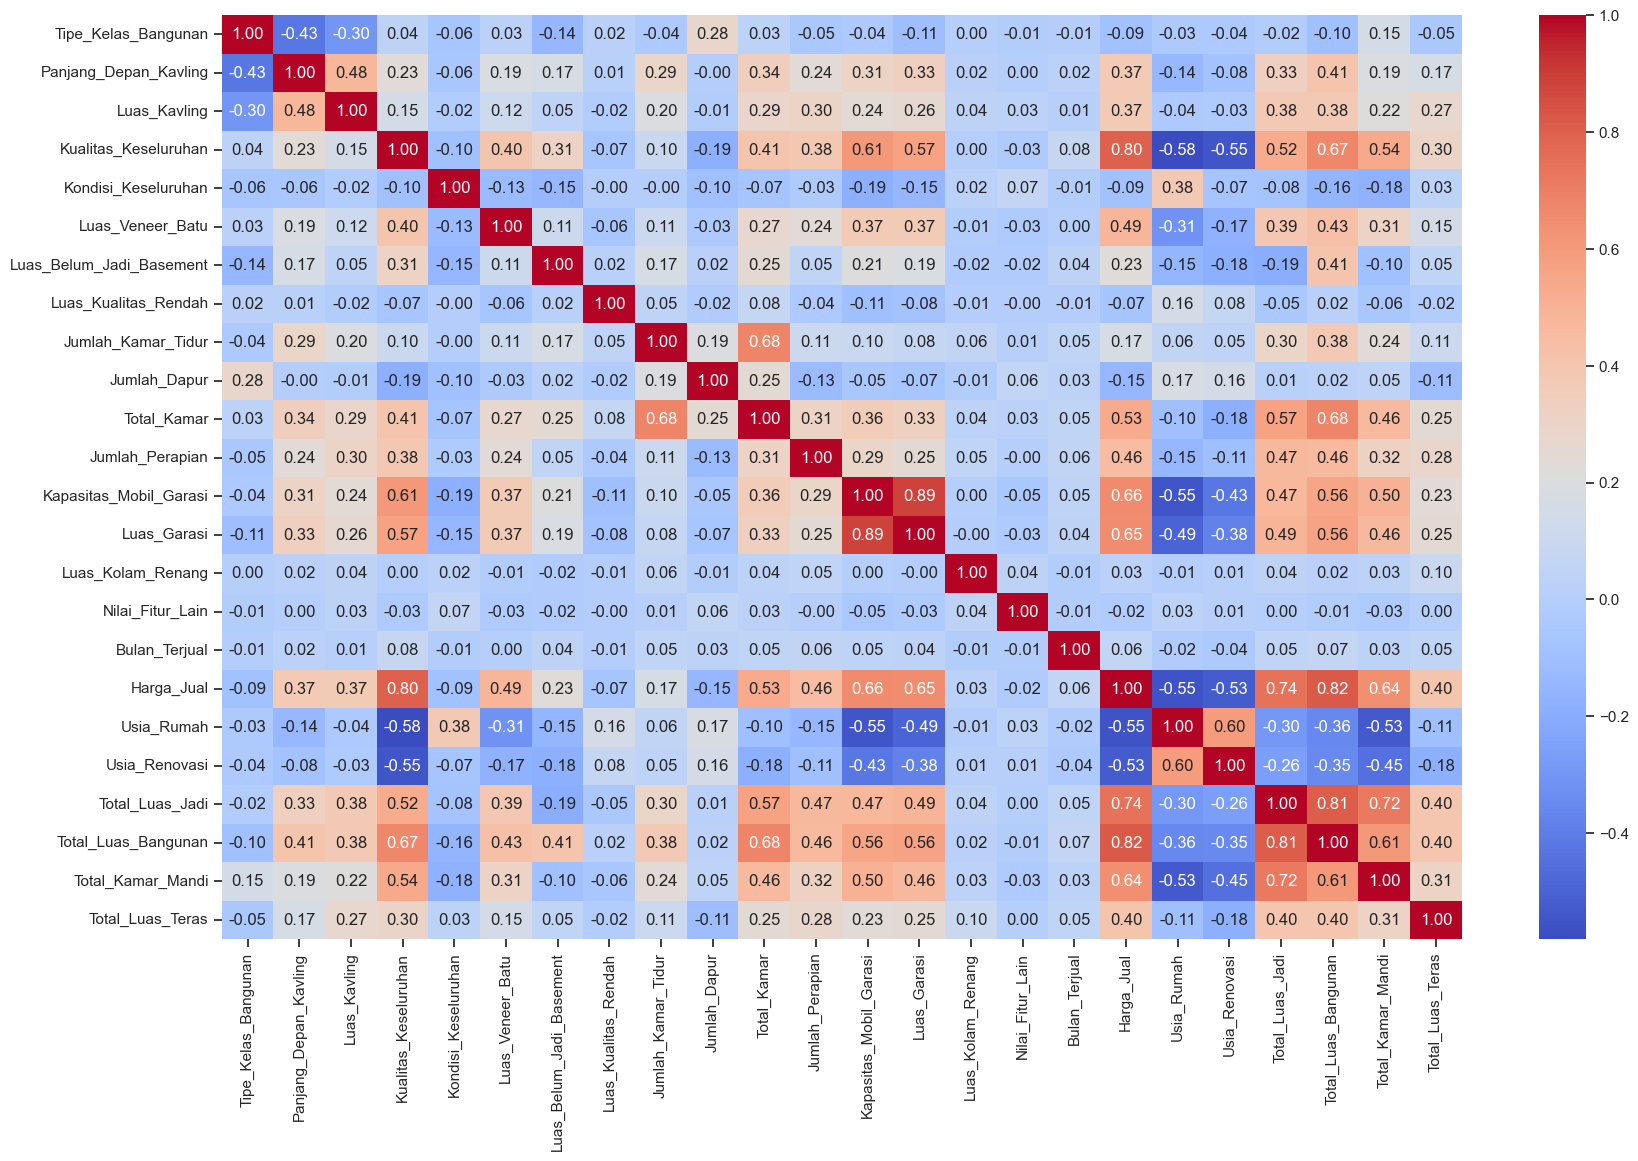

In [122]:
matrix_korelasi = data_latih.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(matrix_korelasi, annot=True, cmap='coolwarm', fmt=".2f")

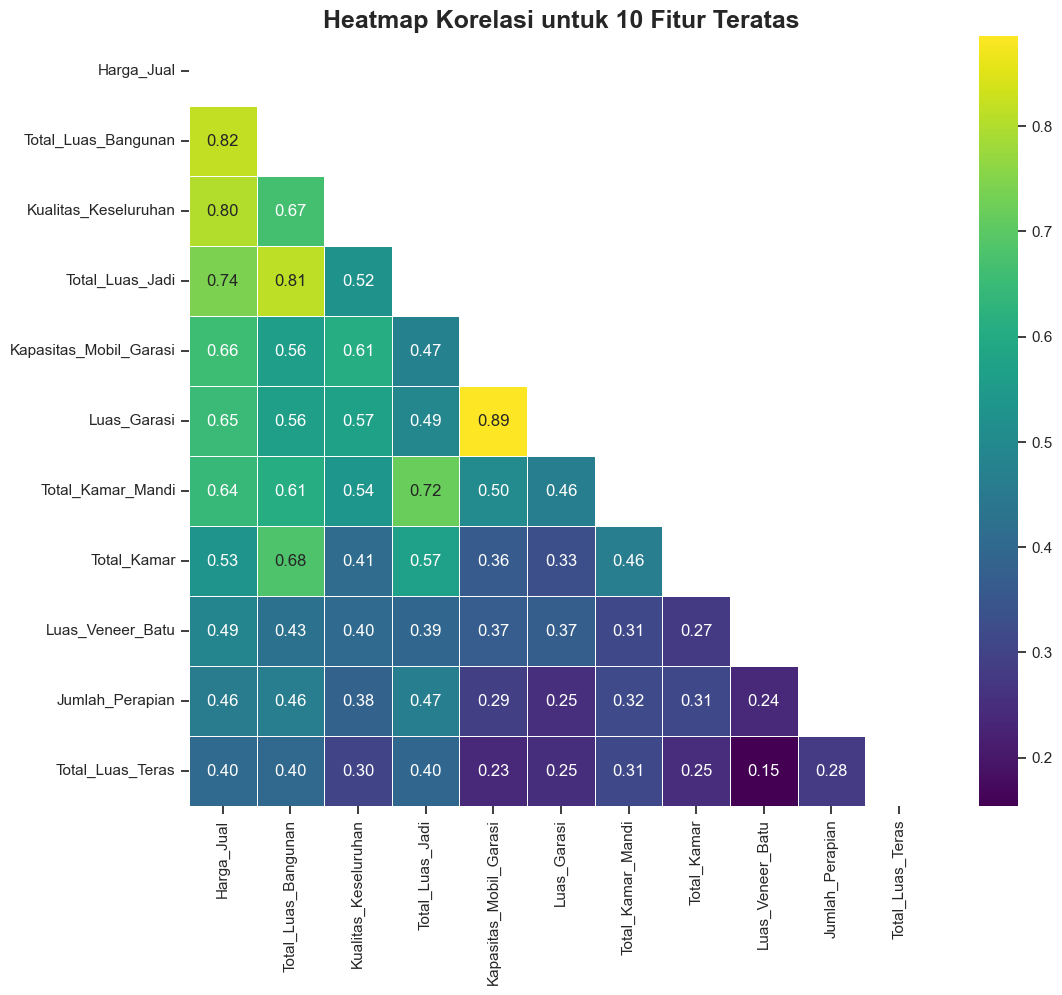

In [123]:
# Ambil 10 fitur dengan korelasi tertinggi terhadap 'Harga_Jual'
n_fitur = 11 # Ambil 11 karena 'Harga_Jual' akan termasuk di dalamnya
kolom_top = matrix_korelasi.nlargest(n_fitur, 'Harga_Jual')['Harga_Jual'].index
matrix_korelasi_top = data_latih[kolom_top].corr()

# Buat mask untuk menyembunyikan segitiga bagian atas
mask = np.triu(np.ones_like(matrix_korelasi_top, dtype=bool))

# Buat heatmap yang sudah ditingkatkan
plt.figure(figsize=(12, 10))
sns.heatmap(matrix_korelasi_top,
            mask=mask,
            annot=True,
            cmap='viridis', # Ganti colormap agar lebih menarik
            fmt=".2f",
            linewidths=.5)

plt.title('Heatmap Korelasi untuk 10 Fitur Teratas', fontsize=18, fontweight='bold')
plt.show()

## 🔥 Heatmap Korelasi 10 Fitur Teratas terhadap Harga Jual

Visualisasi di bawah ini menunjukkan **korelasi antar fitur numerik teratas** dalam dataset dengan variabel target `Harga_Jual`. Korelasi ini dihitung menggunakan **Pearson correlation**.

---

### 💡 Interpretasi:

- **Total_Luas_Bangunan** memiliki korelasi tertinggi (**0.82**) terhadap `Harga_Jual`. Artinya, rumah dengan ukuran bangunan yang lebih besar cenderung memiliki harga jual lebih tinggi.
- **Kualitas_Keseluruhan** menunjukkan korelasi yang sangat kuat (**0.80**) terhadap harga. Ini menunjukkan bahwa rumah dengan material dan finishing berkualitas tinggi lebih mahal.
- **Total_Luas_Jadi** (gabungan basement yang jadi) juga memiliki pengaruh signifikan terhadap harga (**0.74**).
- **Kapasitas_Mobil_Garasi** dan **Luas_Garasi** juga menunjukkan korelasi kuat terhadap `Harga_Jual`, masing-masing sebesar **0.66** dan **0.65**.
- **Total_Kamar_Mandi**, **Total_Kamar**, dan **Jumlah_Perapian** memiliki korelasi sedang.
- Fitur seperti **Total_Luas_Teras** dan **Luas_Kavling** menunjukkan korelasi lemah terhadap `Harga_Jual`.

---

### ⚠️ Catatan Penting:

- Fitur **Luas_Garasi** dan **Kapasitas_Mobil_Garasi** memiliki korelasi tinggi satu sama lain (**0.89**), yang bisa menyebabkan **multikolinearitas** jika dimasukkan bersama dalam model. Sebaiknya hanya salah satu yang dipilih.
- Korelasi tinggi menunjukkan adanya **hubungan linear**, namun tidak selalu menunjukkan hubungan sebab-akibat.

---

### 📌 Kesimpulan:

Fitur dengan korelasi tinggi dapat diprioritaskan untuk membangun model prediksi harga rumah. Namun, perlu dilakukan **feature selection** lanjutan agar model tidak overfitting akibat fitur yang terlalu mirip satu sama lain.


# Menghilangkan Luas Garasi atau Garasi Mobil

In [124]:
data_latih = data_latih.drop(columns=['Luas_Garasi'])
data_uji = data_uji.drop(columns=['Luas_Garasi'])

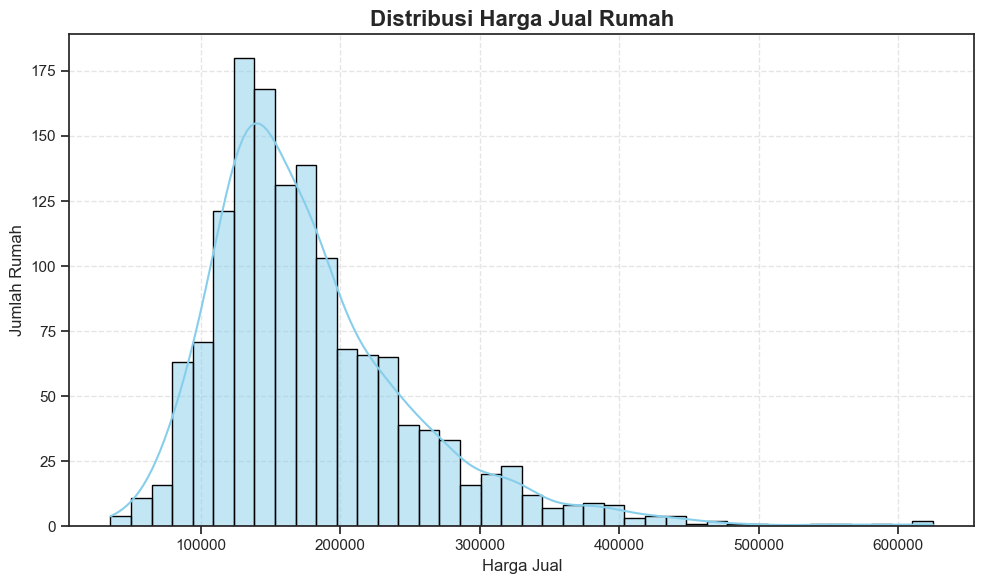

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=data_latih,
    x='Harga_Jual',
    bins=40,
    color='skyblue',
    edgecolor='black',
    kde=True
)

plt.title('Distribusi Harga Jual Rumah', fontsize=16, fontweight='bold')
plt.xlabel('Harga Jual', fontsize=12)
plt.ylabel('Jumlah Rumah', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 📊 Distribusi Harga Jual Rumah

Grafik di atas menampilkan distribusi dari variabel `Harga_Jual`, yaitu harga penjualan rumah dalam dataset. Distribusi ini divisualisasikan dalam bentuk **histogram** dengan tambahan **kurva KDE (Kernel Density Estimation)** untuk melihat bentuk distribusinya secara halus.

---

### 🔍 Interpretasi Visualisasi:

- Sebagian besar rumah memiliki harga jual pada rentang **\$120.000 – \$200.000**.
- Distribusi bersifat **right-skewed** (condong ke kanan), artinya ada beberapa rumah dengan harga yang sangat tinggi (outlier) namun jumlahnya sedikit.
- Bentuk distribusi ini umum dijumpai pada harga rumah, karena rumah mahal lebih jarang daripada rumah dengan harga menengah.
- Hal ini menunjukkan bahwa **normalisasi** atau **transformasi log** mungkin diperlukan untuk model regresi agar distribusi target lebih mendekati normal.

---

### 💡 Insight Awal:

- Harga rumah **tidak tersebar secara merata**, sehingga model prediksi nantinya harus memperhatikan adanya ketidakseimbangan (skewness).
- Rumah dengan harga jual sangat tinggi bisa menjadi **outlier**, dan dapat memengaruhi performa model jika tidak ditangani.

---

### 📌 Catatan Tambahan:

Jika ingin membuat distribusi lebih normal (simetris), bisa menggunakan transformasi berikut:

```python
train_df['LogSalePrice'] = np.log1p(train_df['SalePrice'])


In [126]:
data_latih['Harga_Jual'] = np.log1p(data_latih['Harga_Jual'])

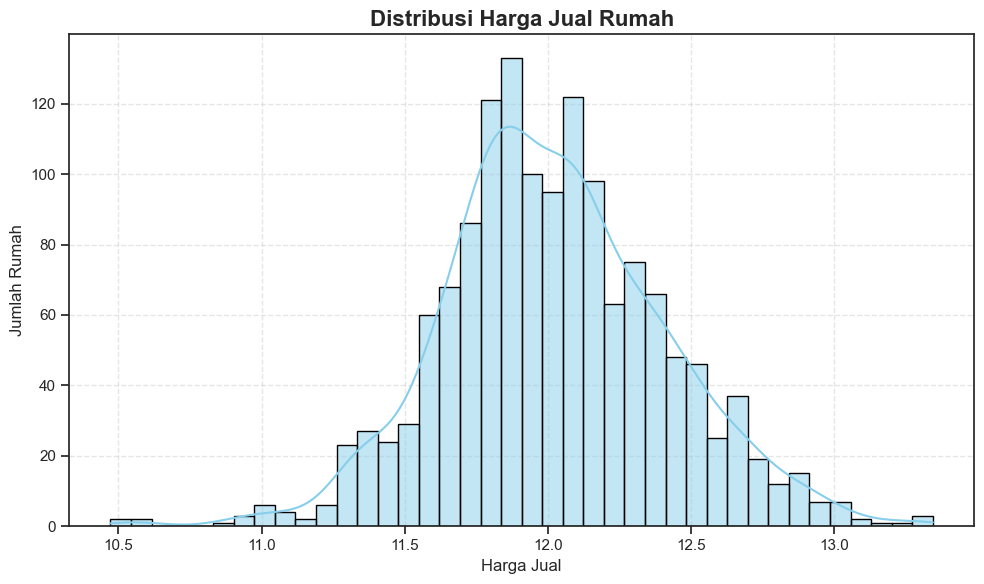

In [127]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=data_latih,
    x='Harga_Jual',
    bins=40,
    color='skyblue',
    edgecolor='black',
    kde=True
)

plt.title('Distribusi Harga Jual Rumah', fontsize=16, fontweight='bold')
plt.xlabel('Harga Jual', fontsize=12)
plt.ylabel('Jumlah Rumah', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [128]:
data_latih.dtypes[data_latih.dtypes=='object']

Klasifikasi_Zona       object
Akses_Jalan            object
Bentuk_Kavling         object
Kontur_Tanah           object
Utilitas               object
Konfigurasi_Kavling    object
Kemiringan_Tanah       object
Lingkungan             object
Kondisi1               object
Kondisi2               object
Tipe_Bangunan          object
Gaya_Rumah             object
Gaya_Atap              object
Material_Atap          object
Eksterior1             object
Eksterior2             object
Tipe_Veneer_Batu       object
Kualitas_Eksterior     object
Kondisi_Eksterior      object
Fondasi                object
Kualitas_Basement      object
Kondisi_Basement       object
Eksposur_Basement      object
Tipe_Jadi_Basement1    object
Pemanas                object
Kualitas_Pemanas       object
AC_Sentral             object
Kelistrikan            object
Kualitas_Dapur         object
Fungsionalitas         object
Kualitas_Perapian      object
Tipe_Garasi            object
Finishing_Garasi       object
Kualitas_G

In [129]:
data_latih.dtypes[data_latih.dtypes !='object']

Tipe_Kelas_Bangunan           int64
Panjang_Depan_Kavling       float64
Luas_Kavling                  int64
Kualitas_Keseluruhan          int64
Kondisi_Keseluruhan           int64
Luas_Veneer_Batu            float64
Luas_Belum_Jadi_Basement      int64
Luas_Kualitas_Rendah          int64
Jumlah_Kamar_Tidur            int64
Jumlah_Dapur                  int64
Total_Kamar                   int64
Jumlah_Perapian               int64
Kapasitas_Mobil_Garasi        int64
Luas_Kolam_Renang             int64
Nilai_Fitur_Lain              int64
Bulan_Terjual                 int64
Harga_Jual                  float64
Usia_Rumah                    int64
Usia_Renovasi                 int64
Total_Luas_Jadi               int64
Total_Luas_Bangunan           int64
Total_Kamar_Mandi           float64
Total_Luas_Teras              int64
dtype: object

In [130]:
analisis_data_kategorikal = [
    'Bentuk_Kavling',         # LotShape
    'Kontur_Tanah',           # LandContour
    'Utilitas',               # Utilities
    'Kemiringan_Tanah',       # LandSlope
    'Kualitas_Basement',      # BsmtQual
    'Tipe_Jadi_Basement1',    # BsmtFinType1
    'AC_Sentral',             # CentralAir
    'Fungsionalitas',         # Functional
    'Kualitas_Perapian',      # FireplaceQu
    'Finishing_Garasi',       # GarageFinish
    'Kualitas_Garasi',        # GarageQual
    'Jalan_Aspal',            # PavedDrive
    'Kondisi_Eksterior',      # ExterCond
    'Kualitas_Dapur',         # KitchenQual
    'Eksposur_Basement',      # BsmtExposure
    'Kualitas_Pemanas',       # HeatingQC
    'Kualitas_Eksterior',     # ExterQual
    'Kondisi_Basement'        # BsmtCond
]

In [131]:
# One-Hot Encoding (OHE)
kategori_tanpa_urutan =  [
    'Akses_Jalan',             # Street
    'Konfigurasi_Kavling',     # LotConfig
    'Lingkungan',              # Neighborhood
    'Kondisi1',                # Condition1
    'Kondisi2',                # Condition2
    'Tipe_Bangunan',           # BldgType
    'Gaya_Rumah',              # HouseStyle
    'Gaya_Atap',               # RoofStyle
    'Eksterior1',              # Exterior1st
    'Eksterior2',              # Exterior2nd
    'Tipe_Veneer_Batu',        # MasVnrType
    'Fondasi',                 # Foundation
    'Kelistrikan',             # Electrical
    'Tipe_Penjualan',          # SaleType
    'Klasifikasi_Zona',        # MSZoning
    'Kondisi_Penjualan',       # SaleCondition
    'Pemanas',                 # Heating
    'Tipe_Garasi',             # GarageType
    'Material_Atap'            # RoofMatl
]

In [132]:
kolom_numerik = data_latih.select_dtypes(include=['int64', 'float64']).columns
kolom_numerik = kolom_numerik.drop('Harga_Jual')

In [133]:
pipeline_numerik = Pipeline(steps=[
    ('imputasi', SimpleImputer(strategy='mean')),      # Langkah imputasi nilai kosong
    ('skalasi', StandardScaler())                      # Langkah normalisasi data
])

In [134]:
# Pipeline untuk fitur kategorikal ordinal:
# 1. Mengisi nilai kosong dengan data yang paling sering muncul
# 2. Mengubah kategori ke angka berdasarkan urutan (ordinal encoding)

pipeline_ordinal = Pipeline(steps=[
    ('imputasi', SimpleImputer(strategy='most_frequent')),  # Isi NaN dengan nilai yang paling sering
    ('pengkodean_ordinal', OrdinalEncoder(
        handle_unknown='use_encoded_value',
        unknown_value=-1                                       # Beri nilai -1 untuk kategori tak dikenal
    ))
])

In [135]:
# Pipeline untuk fitur kategorikal nominal (tanpa urutan):
# 1. Mengisi nilai kosong dengan data yang paling sering muncul
# 2. Mengubah kategori menjadi vektor biner (one-hot encoding)

pipeline_ohe = Pipeline(steps=[
    ('imputasi', SimpleImputer(strategy='most_frequent')),  # Isi NaN dengan nilai paling sering
    ('pengkodean_ohe', OneHotEncoder(
        handle_unknown='ignore',        # Abaikan kategori baru yang tidak terlihat saat training
        sparse_output=False             # Output berupa array biasa, bukan format sparse
    ))
])

In [136]:
# ColumnTransformer untuk menerapkan pipeline yang berbeda ke tipe fitur yang berbeda:
# - Fitur numerik diproses dengan pipeline numerik (imputasi + scaling)
# - Fitur kategorikal ordinal diproses dengan pipeline ordinal (imputasi + ordinal encoding)
# - Fitur kategorikal nominal diproses dengan pipeline OHE (imputasi + one-hot encoding)

transformasi_kolom = ColumnTransformer(
    transformers=[
        ('numerik', pipeline_numerik, kolom_numerik),           # Fitur numerik
        ('pengkodean_ordinal', pipeline_ordinal, analisis_data_kategorikal),                # Fitur ordinal (berurutan)
        ('nominal', pipeline_ohe, kategori_tanpa_urutan)                     # Fitur nominal (kategori tanpa urutan)
    ],
    remainder='passthrough',  # Sisanya dilewatkan apa adanya
    n_jobs=-1                 # Gunakan semua inti CPU untuk proses paralel
)

In [137]:
pipeline = Pipeline(steps=[
    ('preprocessing', transformasi_kolom)
])

In [138]:
X = data_latih.drop('Harga_Jual', axis=1)
y = data_latih['Harga_Jual']

In [139]:
X_preprocessed = pipeline.fit_transform(X)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

# Tinggal Pembuatan Model

In [141]:
lr = LinearRegression()

In [142]:
lr.fit(X_train, y_train)

LinearRegression()

In [143]:
y_pred_lr = lr.predict(X_test)

In [144]:
mean_squared_error(y_test, y_pred_lr)

0.0176059015907328

### 📉 Evaluasi Model: Mean Squared Error (MSE)

Setelah melakukan prediksi menggunakan model Linear Regression, kita menghitung **Mean Squared Error (MSE)** untuk mengevaluasi seberapa jauh hasil prediksi dari nilai sebenarnya.

```python
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_lr)


In [145]:
!pip install tqdm

In [146]:
from tqdm import tqdm
from time import time

In [147]:
!nvidia-smi


'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [148]:
RFR = RandomForestRegressor(random_state=13)

In [149]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [150]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [151]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [152]:
np.sqrt(-1 * rfr_cv.best_score_)

np.float64(0.13397556854447154)

In [153]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}

In [154]:
XGB = XGBRegressor(random_state=13)

In [155]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [156]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [157]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [158]:
np.sqrt(-1 * xgb_cv.best_score_)

np.float64(0.1180060796580219)

In [159]:
ridge = Ridge()

In [160]:
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [161]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [162]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [163]:
np.sqrt(-1 * ridge_cv.best_score_)

np.float64(0.10844908938122043)

In [164]:
GBR = GradientBoostingRegressor()

In [165]:
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

In [166]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [167]:
GBR_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [168]:
np.sqrt(-1 * GBR_cv.best_score_)


np.float64(0.11333394323935327)

In [169]:
lgbm_regressor = lgb.LGBMRegressor()

In [170]:
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [171]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [172]:
lgbm_cv.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 110
[LightGBM] [Info] Start training from score 12.023259


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [173]:
np.sqrt(-1 * lgbm_cv.best_score_)

np.float64(0.1268401602986432)

In [174]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [175]:
param_grid_cat ={
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [176]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [177]:
cat_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000019B4FB70920>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [178]:
np.sqrt(-1 * cat_cv.best_score_)

np.float64(0.1150104464760048)

In [179]:
vr = VotingRegressor([('gbr', GBR_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)],
                    weights=[2,3,1])

In [180]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=15,
                                                       max_features=0.1,
                                                       min_samples_leaf=25,
                                                       n_estimators=1000)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.9, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_m...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None, ...)),
                            ('ridge', Ridge(alpha=10, solver='lsqr'))],
                weights=[2, 3, 1])

In [181]:
y_pred_vr = vr.predict(X_test)

In [184]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_vr))
print("RMSE:", rmse)

RMSE: 0.11800463497203645


In [185]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [186]:
stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = vr
)

In [187]:
stackreg.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 110
[LightGBM] [Info] Start training from score 12.023259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1887
[LightGBM] [Info] Number of data points in the train set: 920, number of used features: 104
[LightGBM] [Info] Start training from score 12.032469


d:\Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1874
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 105
[LightGBM] [Info] Start training from score 12.018337


d:\Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1885
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 106
[LightGBM] [Info] Start training from score 12.020647


d:\Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1877
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 106
[LightGBM] [Info] Start training from score 12.021127


d:\Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1878
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 107
[LightGBM] [Info] Start training from score 12.023724


d:\Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=15,
                                                         max_features=0.1,
                                                         min_samples_leaf=25,
                                                         n_estimators=1000)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.9, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval...
                                                                            importance_type=None,
                                                                            interaction_constraints=None,
                                                                            learning_rate=0.1,
                                                                            max_bin=None,
                                                                            max_cat_threshold=None,
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=3,
                                                                            max_leaves=None,
                                                                            min_child_weight=1,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=300,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None, ...)),
                                                              ('ridge',
                                                               Ridge(alpha=10,
                                                                     solver='lsqr'))],
                                                  weights=[2, 3, 1]))

In [188]:
y_pred_stack = stackreg.predict(X_test)

d:\Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [191]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_stack))
print("RMSE:", rmse)

RMSE: 0.12093433835628466


In [192]:
df_test_preprocess = pipeline.transform(data_uji)

In [193]:
y_stacking = np.exp(stackreg.predict(df_test_preprocess))

df_y_stacking_out = data_uji[['Id']]
df_y_stacking_out['Harga_Jual'] = y_stacking

df_y_stacking_out.to_csv('submission.csv', index=False)

d:\Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\amans\AppData\Local\Temp\ipykernel_23276\2531765250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_stacking_out['Harga_Jual'] = y_stacking


In [194]:
data_hasil = pd.read_csv(r'D:\Project\prediksi_harga_rumah_ames_dengan_random_forest\notebook\submission.csv')
data_hasil

Id     Harga_Jual
0     1461  123798.415922
1     1462  167675.412326
2     1463  189370.690708
3     1464  186704.355063
4     1465  180690.716619
...    ...            ...
1454  2915   94585.657837
1455  2916   95881.978138
1456  2917  163247.648545
1457  2918  119385.923922
1458  2919  229599.604316

[1459 rows x 2 columns]